# Tarea 1 

Alumnos:

* Miguel Espinoza
* Sebastián López
* Pedro Pérez

### P1

### Parte 1

In [1]:
import os

folder = 'data/raw/'  #Carpeta principal en la que estan los archivos
weeks = os.listdir(folder)  #Se agregan las subcarpetas a una lista
weeks

['w13', 'w14', 'w15', 'w16', 'w17']

In [2]:
#Se crean dos listas para guardar los archivos normales
#y los 'furnished'
files = []
files_furnished = []

#Mediante un bucle for se guardan las direcciones de todos
#los archivos en las listas creadas
for week in weeks:
    direccion = folder + week + '/'
    file = os.listdir(direccion)
    files.append(direccion + file[0])
    files_furnished.append(direccion + file[1])
    
files

['data/raw/w13/metrocuadrado_all_w13.csv',
 'data/raw/w14/metrocuadrado_all_w14.csv',
 'data/raw/w15/metrocuadrado_all_w15.csv',
 'data/raw/w16/metrocuadrado_all_w16.csv',
 'data/raw/w17/metrocuadrado_all_w17.csv']

In [3]:
import pandas as pd

#Se lee el primer dataframe para observar los datos
data_all = pd.read_csv(files[0])
data_all.head(3)

,property_type|rent_type|location,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index
0,"Casa en Arriendo, LA SOLEDAD NORTE Bogotá D.C..",$1.050.000,3,2,63.0 m2,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6
1,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3,2,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3
2,"Casa en Arriendo, VILLA DE LOS ALPES II SECTOR...",$750.000,3,1,90.0 m2,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2


En primer lugar se combinan los dataframes normales

In [4]:
data_all = pd.read_csv(files[0])

for file in files:
    dato_semanal = pd.read_csv(file)
    data_all = data_all.merge(dato_semanal, how = 'outer') 
    #Se pone 'outer' para hacer la union de todos los dataframes

print('Cantidad de datos: ', len(data_all))
data_all.head(3)

Cantidad de datos:  16470


,property_type|rent_type|location,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index
0,"Casa en Arriendo, LA SOLEDAD NORTE Bogotá D.C..",$1.050.000,3,2,63.0 m2,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6
1,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3,2,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3
2,"Casa en Arriendo, VILLA DE LOS ALPES II SECTOR...",$750.000,3,1,90.0 m2,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2


In [5]:
#Se ve si hay duplicados
print('Duplicados: ', data_all.duplicated().sum())

Duplicados:  175


In [6]:
#Se eliminan las filas duplicadas
data_all.drop_duplicates(inplace=True)
print('Cantidad de datos: ', len(data_all))

Cantidad de datos:  16295


Ahora se combinan los archivos furnished

In [7]:
data_furnished = pd.read_csv(files_furnished[0])

for file in files_furnished:
    dato_semanal = pd.read_csv(file)
    data_furnished = data_furnished.merge(dato_semanal, how='outer')

print('Cantidad de datos: ', len(data_furnished))
data_furnished.head(3)

Cantidad de datos:  2101


,property_type|rent_type|location,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index
0,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3.0,2.0,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3
1,"Casa en Venta Y Arriendo, BELLAVISTA Bogotá D.C..",$1.300.000,3.0,2.0,72.0 m2,"hermosa casa en venta y en arriendo en, mandal...",https://www.metrocuadrado.com/inmueble/venta-c...,41.4
2,"Casa en Arriendo, PORTALES DEL NORTE Bogotá D.C..",$1.800.000,3.0,3.0,76.81 m2,Estrato 4. CASA TRIPLEX!! Exterior . Cuenta co...,https://www.metrocuadrado.com/inmueble/arriend...,41.3


In [8]:
#Se buscan los duplicados y se eliminan
print('Duplicados: ', data_furnished.duplicated().sum())

Duplicados:  2


In [9]:
data_furnished.drop_duplicates(inplace=True)

print('Cantidad de datos: ', len(data_furnished))
#Se observa que son muchos menos los datos de tipo furnished

Cantidad de datos:  2099


Al intentar combinar ambos dataframes usando `data_all.merge(data_furnished, how='outer')` aparece el error:

`ValueError: You are trying to merge on object and float64 columns. If you wish to proceed you should use pd.concat`

Por lo que se decide comprobar los tipos de las columnas

In [10]:
#Se observan las columnas de los dataframe
print('Tipos Data All')
print(data_all.dtypes)
print()
print('Tipos Data Furnished')
print(data_furnished.dtypes)

Tipos Data All
property_type|rent_type|location     object
price                                object
n_rooms                              object
n_bath                               object
surface                              object
details                              object
url                                  object
metrocuadrado_index                 float64
dtype: object

Tipos Data Furnished
property_type|rent_type|location     object
price                                object
n_rooms                             float64
n_bath                              float64
surface                              object
details                              object
url                                  object
metrocuadrado_index                 float64
dtype: object


Se observa que el error se debe a que en `Data All` las columnas `n_rooms` y `n_bath` son de tipo `object`, en cambio en `Data Furnished` son de tipo `float64`.

Este problema se resuelve simplemente cambiando el tipo de esas columnas.

In [11]:
#Se cambian las columnas de 'data_furnished' a object
data_furnished = data_furnished.astype({'n_rooms':'object', 'n_bath':'object'})

#Obs: No se pueden cambiar las columnas de 'data_all' a float64, pues hay un dato llamado '5+'

In [12]:
#Se combinan los dataframes
data = data_all.merge(data_furnished, how='outer', indicator='Furnished')

#Se coloca utiliza el parámetro indicator para indicar de que dataframe 
#proviene cada fila.
#left_only indica que viene del dataframe 'data_all'
#right_only indica que viene del dataframe 'data_furnished'
#y both que proviene de ambos

print('Cantidad de datos: ', len(data))
data.head(3)

Cantidad de datos:  18394


,property_type|rent_type|location,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,Furnished
0,"Casa en Arriendo, LA SOLEDAD NORTE Bogotá D.C..",$1.050.000,3,2,63.0 m2,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,left_only
1,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3,2,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,left_only
2,"Casa en Arriendo, VILLA DE LOS ALPES II SECTOR...",$750.000,3,1,90.0 m2,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,left_only


In [13]:
data['Furnished'].replace({'left_only':'No', 'right_only':'Si', 'both':'Ambos'}, inplace=True)

#Se cambian los nombres para indicar más claramente si provienen de furnished o no
data.head(3)

,property_type|rent_type|location,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,Furnished
0,"Casa en Arriendo, LA SOLEDAD NORTE Bogotá D.C..",$1.050.000,3,2,63.0 m2,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,No
1,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3,2,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,No
2,"Casa en Arriendo, VILLA DE LOS ALPES II SECTOR...",$750.000,3,1,90.0 m2,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,No


In [14]:
#Se cuentan la cantidad de cada valores de cada tipo
data['Furnished'].value_counts()

No    16295
Si     2099
Name: Furnished, dtype: int64

Como se observa no hay elementos comunes entre ambos grupos, son disjuntos. No hay archivos con texto 'furnished' que no estén contenidos en archivos con texto 'all'.

In [15]:
#Esto se comprueba tambien haciendo una intersección entre los dataframes
#mediante el argumento 'inner'
pd.merge(data_all, data_furnished, how='inner')

#Se observa que el resultado es un dataframe vacío

,property_type|rent_type|location,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index


### Parte 2

#### A

Primero se limpia el precio

In [16]:
data['price'].head(3)

0    $1.050.000
1    $3.930.000
2      $750.000
Name: price, dtype: object

Se observa que son de tipo `object`, pues el precio contiene el signo peso '$' y los puntos. Convendría eliminar este signo y los puntos para poder pasar los datos a `float64`.

In [17]:
data['price'] = data['price'].str.replace('$','')
data['price'] = data['price'].str.replace('.','')
data['price'].head(3)

0    1050000
1    3930000
2     750000
Name: price, dtype: object

In [18]:
#Se cambia el tipo a float64
data['price'] = data['price'].astype('float')
data['price'].head(3)

0    1050000.0
1    3930000.0
2     750000.0
Name: price, dtype: float64

In [19]:
#Finalmente se revisa que no hayan nulos
data['price'].isnull().sum()

0

Ahora se limpia el área

In [20]:
data['surface'].tail(4)

18390    164.34 m2
18391     110.0 m2
18392     106.0 m2
18393     135.0 m2
Name: surface, dtype: object

Se deben eliminar los carácteres ' m2' al final del número, y luego cambiar el tipo a `float`.

In [21]:
data['surface'] = data['surface'].str.replace(' m2','')
data['surface'] = data['surface'].astype('float')
data['surface'].tail(4)

18390    164.34
18391    110.00
18392    106.00
18393    135.00
Name: surface, dtype: float64

In [22]:
#Se revisa que no hayan nulos
data['surface'].isnull().sum()

0

In [23]:
#Finalmente se revisa si hay valores extraños
data['surface'][data['surface']==0]

4014     0.0
5170     0.0
5171     0.0
5293     0.0
5424     0.0
5425     0.0
5564     0.0
5655     0.0
5800     0.0
5819     0.0
5850     0.0
5894     0.0
5895     0.0
5930     0.0
12337    0.0
16280    0.0
Name: surface, dtype: float64

Claramente es imposible que exista una vivienda con área nula.

Se revisan los datos que crean problemas, y se cuenta el número de ellos.

In [24]:
area_nula = data[data['surface']==0]
print('Número de datos con área nula: {}'.format(len(area_nula)))
area_nula

Número de datos con área nula: 16


,property_type|rent_type|location,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,Furnished
4014,"Apartamento en Arriendo, CHAPINERO NORTE Bogot...",1614000.0,1,1,0.0,"Aparta estudio en arriendo, alcoba con closet ...",https://www.metrocuadrado.com/inmueble/arriend...,72.5,No
5170,"Apartamento en Arriendo, LA ISABELA Bogotá D.C..",685121.0,1,NaN,0.0,Ninguna,https://www.metrocuadrado.com/inmueble/arriend...,60.4,No
5171,"Apartamento en Arriendo, SAN LUIS Bogotá D.C..",1062754.0,1,NaN,0.0,Ninguna,https://www.metrocuadrado.com/inmueble/arriend...,32.5,No
5293,"Apartamento en Arriendo, EL SALITRE Bogotá D.C..",583945.0,1,NaN,0.0,NaN,https://www.metrocuadrado.com/inmueble/arriend...,54.7,No
5424,"Apartamento en Arriendo, EL CHILCAL Bogotá D.C..",333123.0,1,NaN,0.0,Ninguna,https://www.metrocuadrado.com/inmueble/arriend...,47.0,No
5425,"Apartamento en Arriendo, COLOMBIA Bogotá D.C..",1400000.0,1,NaN,0.0,Ninguna,https://www.metrocuadrado.com/inmueble/arriend...,55.8,No
5564,"Apartamento en Arriendo, SANTA BARBARA CENTRAL...",1317950.0,1,NaN,0.0,NaN,https://www.metrocuadrado.com/inmueble/arriend...,44.0,No
5655,"Apartamento en Arriendo, SANTA BARBARA CENTRAL...",2743261.0,1,NaN,0.0,Ninguna,https://www.metrocuadrado.com/inmueble/arriend...,51.7,No
5800,"Apartamento en Arriendo, TUNA ALTA Bogotá D.C..",442023.0,1,NaN,0.0,Ninguna,https://www.metrocuadrado.com/inmueble/arriend...,46.8,No
5819,"Apartamento en Arriendo, EL SALITRE Bogotá D.C..",462441.0,1,NaN,0.0,Ninguna,https://www.metrocuadrado.com/inmueble/arriend...,53.6,No


Como son pocos los datos y además presentan datos nulos en otras columnas, se decide eliminarlos.

In [25]:
data = data.drop(area_nula.index)

In [26]:
#Finalmente se resetea el indice
data.reset_index(drop=True, inplace=True)

In [27]:
#Se elimina la columan que

Ahora se limpia el número de habitaciones

In [28]:
data['n_rooms'].head(3)

0    3
1    3
2    3
Name: n_rooms, dtype: object

Parece que fueran números enteros, pero el tipo de la columna es object

In [29]:
#Se ven los valores de la columna
data['n_rooms'].unique()

array(['3', '5', '4', '2', '1', nan, '5+', 3.0, 5.0, 4.0, 2.0, 1.0],
      dtype=object)

Se observa que la columna tiene valores de tipo string y float. Más aún se ve que se podría cambiar inmediatamente el tipo a `float` sino existiera el valor `5+`.

In [30]:
#Se cuenta cuantas entradas hay de cada valor
data['n_rooms'].value_counts()

2      6571
1      6255
3      1351
4      1198
1.0    1040
2.0     938
5       862
3.0      52
5.0      36
4.0      32
5+        9
Name: n_rooms, dtype: int64

Se ve que solo son 9 las entradas con valor `5+`, por lo que es una parte infima del total del dataset que es de $18394$ entradas, simplemente se podrían eliminar. Pero como no se desea botar datos, se cambiará el valor `5+` por $6$, dado que es el entero mayor a 5 más cercano.

In [31]:
data['n_rooms'].replace('5+',6, inplace=True)
#Se reemplazan el valor que daba problemas, y se muestran los valores de las entradas
data['n_rooms'].unique()

array(['3', '5', '4', '2', '1', nan, 6, 3.0, 5.0, 4.0, 2.0, 1.0],
      dtype=object)

In [32]:
#Como esta correcto, se puede cambiar el tipo de la columna
data['n_rooms'] = data['n_rooms'].astype('float')
data['n_rooms'].head(3)

0    3.0
1    3.0
2    3.0
Name: n_rooms, dtype: float64

In [33]:
#Finalmente se revisa que si hay nulos
data['n_rooms'].isnull().sum()

34

Por último se limpia el número de baños

In [34]:
data['n_bath'].tail(3)

18375    3
18376    3
18377    2
Name: n_bath, dtype: object

Nuevamente parecen ser enteros, pero el tipo es object

In [35]:
#Se ven los valores de la columna
data['n_bath'].unique()

array(['2', '1', '4', '3', nan, '5', '5+', 2.0, 3.0, 4.0, 5.0, 1.0],
      dtype=object)

Nuevamente el error viene dado por `5+`, por lo que se procede de igual manera que en `n_rooms`.

In [36]:
#Hay 8 valores con error
data['n_bath'].value_counts()

2      7019
1      3517
3      3293
4      1348
2.0    1085
5       878
1.0     515
3.0     394
4.0      58
5.0      44
5+        8
Name: n_bath, dtype: int64

In [37]:
data['n_bath'] = data['n_bath'].replace('5+',6) #Se reemplazan '5+' por 6
data['n_bath'] = data['n_bath'].astype('float') #Se cambia el tipo a float
data['n_bath'].head(3)

0    2.0
1    2.0
2    1.0
Name: n_bath, dtype: float64

In [38]:
#Finalmente se revisa que si hay nulos
data['n_bath'].isnull().sum()

219

Finalmente se muestran nuevamente los tipos de las columnas

In [39]:
data.dtypes

property_type|rent_type|location     object
price                               float64
n_rooms                             float64
n_bath                              float64
surface                             float64
details                              object
url                                  object
metrocuadrado_index                 float64
Furnished                            object
dtype: object

#### B

Se debe dividir la columna `property_type|rent_type|location` en 3 columnas distintas.

In [40]:
#Se hace una copia de la data por si se realiza un error
copia_seguridad = data.copy()

In [41]:
#Cuando algo salga mal correr esta celda
data = copia_seguridad.copy()

In [42]:
#Se muestran unos pocos datos de esta columna
data['property_type|rent_type|location']

0          Casa en Arriendo, LA SOLEDAD NORTE Bogotá D.C..
1        Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...
2        Casa en Arriendo, VILLA DE LOS ALPES II SECTOR...
3              Casa en Arriendo, PARIS GAITAN Bogotá D.C..
4        Casa en Arriendo, BALCONES DE ORIENTE Bogotá D...
                               ...                        
18373    Apartamento en Arriendo, CHICO NORTE Bogotá D.C..
18374    Apartamento en Arriendo, CHICO NORTE II Bogotá...
18375    Apartamento en Venta Y Arriendo, CHICO NORTE B...
18376    Apartamento en Arriendo, MOLINOS NORTE Bogotá ...
18377       Apartamento en Arriendo, EL NOGAL Bogotá D.C..
Name: property_type|rent_type|location, Length: 18378, dtype: object

Se pueden deducir varias cosas:
1. El tipo de propiedad es la primera palabra del string.
2. El tipo de renta aparece después de la palabra 'en' y un espacio ' '.
3. El lugar esta después de la coma.

En primer lugar se decide dividir el string en dos partes separadas por la coma.

In [43]:
new_columns = data['property_type|rent_type|location'].str.split(pat=',', expand=True)
new_columns.head(3)

,0,1
0,Casa en Arriendo,LA SOLEDAD NORTE Bogotá D.C..
1,Casa en Arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..
2,Casa en Arriendo,VILLA DE LOS ALPES II SECTOR Bogotá D.C..


In [44]:
#Se insertan las columnas en la data 
data[['property_type|rent_type', 'location']] = new_columns

#Se elimina la columna original
data.drop('property_type|rent_type|location', axis=1, inplace=True)

data.head(3)

,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,Furnished,property_type|rent_type,location
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,No,Casa en Arriendo,LA SOLEDAD NORTE Bogotá D.C..
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,No,Casa en Arriendo,CIUDAD SALITRE SUR-ORIENTAL Bogotá D.C..
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,No,Casa en Arriendo,VILLA DE LOS ALPES II SECTOR Bogotá D.C..


Se debe trabajar con la columna location para que quede sólo el nombre del barrio, es decir las palabras en mayúsculas.

In [45]:
location = data['location'].copy()
location = location.str.split()

Mediante dos bucles for se puede eliminar la ciudad de la columna location.

In [46]:
#Primero se busca en las filas
for fila in location:
    #Luego en cada palabra de la fila
    for i in range(len(fila)):
        #Si la palabra no esta mayuscula
        if not fila[i].isupper():
            #elimina la palabra y todas las palabras que le siguen de la lista
            del fila[i:]
            break

In [47]:
#Se observa el resultado
location.head()

0                   [LA, SOLEDAD, NORTE]
1        [CIUDAD, SALITRE, SUR-ORIENTAL]
2    [VILLA, DE, LOS, ALPES, II, SECTOR]
3                        [PARIS, GAITAN]
4                [BALCONES, DE, ORIENTE]
Name: location, dtype: object

Por ultimo se unen las palabras de cada lista y se añaden al dataframe.

In [48]:
location = location.str.join(' ')
data['location'] = location
data.head(3)

,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,Furnished,property_type|rent_type,location
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,No,Casa en Arriendo,LA SOLEDAD NORTE
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,No,Casa en Arriendo,CIUDAD SALITRE SUR-ORIENTAL
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,No,Casa en Arriendo,VILLA DE LOS ALPES II SECTOR


Ahora se divide la columna `property_type|rent_type` en dos columnas más.

In [49]:
new_columns = data['property_type|rent_type'].str.split(pat='en ', expand=True)
new_columns.head(3)

,0,1
0,Casa,Arriendo
1,Casa,Arriendo
2,Casa,Arriendo


In [50]:
#Se insertan las columnas en la data y se elimina la columna original
data[['property','rent']] = new_columns
data.drop('property_type|rent_type', axis=1, inplace=True)
data.head(3)

,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,Furnished,location,property,rent
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,No,LA SOLEDAD NORTE,Casa,Arriendo
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,No,CIUDAD SALITRE SUR-ORIENTAL,Casa,Arriendo
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,No,VILLA DE LOS ALPES II SECTOR,Casa,Arriendo


Por último se revisa que no hayan espacios vacíos al inicio o final de las nuevas columnas.

In [51]:
print(data['location'][0])
print(data['property'][0])
print(data['rent'][0])

LA SOLEDAD NORTE
Casa 
Arriendo


La columna property tiene espacios, por lo que se utiliza strip para eliminarlos.

In [52]:
data['property'] = data['property'].str.strip()

### Parte 3

#### A

Se debe generar una nueva columna que contenga el precio por metro cuadrado.

Para esto simplemente se divide el precio por la superficie.

In [53]:
data['Precio m2'] = data['price']/data['surface']
data.head(4)

,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,Furnished,location,property,rent,Precio m2
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,No,LA SOLEDAD NORTE,Casa,Arriendo,16666.666667
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,No,CIUDAD SALITRE SUR-ORIENTAL,Casa,Arriendo,39300.000000
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,No,VILLA DE LOS ALPES II SECTOR,Casa,Arriendo,8333.333333
3,3400000.0,5.0,4.0,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,No,PARIS GAITAN,Casa,Arriendo,47887.323944


#### B

Se debe obtener el número de garajes a partir de la columna url.

In [54]:
# Se revisa la columna url
for i in range(5):
    print(data['url'][i])

https://www.metrocuadrado.com/inmueble/arriendo-casa-bogota-la-soledad-norte-3-habitaciones-2-banos-1-garajes/35-M1919
https://www.metrocuadrado.com/inmueble/arriendo-casa-bogota-ciudad-salitre-sur-oriental-3-habitaciones-2-banos-1-garajes/769-M2387196
https://www.metrocuadrado.com/inmueble/arriendo-casa-bogota-villa-de-los-alpes-ii-sector-3-habitaciones-1-banos/BOSA-04551604
https://www.metrocuadrado.com/inmueble/arriendo-casa-bogota-paris-gaitan-5-habitaciones-4-banos/OCHE-04552802
https://www.metrocuadrado.com/inmueble/arriendo-casa-bogota-balcones-de-oriente-4-habitaciones-3-banos-1-garajes/943-M2386284


Se observa que el número de garajes aparece dentro de la url de la página.

Parece ser del estilo `n-garajes`, donde `n` es el número de garajes de la propiedad.

Sin embargo se debe tener cuidado porque hay url que no tienen garajes.

In [55]:
#En primer lugar se divide la url de acuerdo al separarador '/'
data['url'].str.split(pat='/', expand=True).head(3)

,0,1,2,3,4,5
0,https:,,www.metrocuadrado.com,inmueble,arriendo-casa-bogota-la-soledad-norte-3-habita...,35-M1919
1,https:,,www.metrocuadrado.com,inmueble,arriendo-casa-bogota-ciudad-salitre-sur-orient...,769-M2387196
2,https:,,www.metrocuadrado.com,inmueble,arriendo-casa-bogota-villa-de-los-alpes-ii-sec...,BOSA-04551604


In [56]:
#Se observa que la columna 4 contiene el detalle de la vivienda
detalle = data['url'].str.split(pat='/', expand=True)[4]

#Se imprimen algunos datos de ejemplos
for i in range(5):
    print(detalle[i])

arriendo-casa-bogota-la-soledad-norte-3-habitaciones-2-banos-1-garajes
arriendo-casa-bogota-ciudad-salitre-sur-oriental-3-habitaciones-2-banos-1-garajes
arriendo-casa-bogota-villa-de-los-alpes-ii-sector-3-habitaciones-1-banos
arriendo-casa-bogota-paris-gaitan-5-habitaciones-4-banos
arriendo-casa-bogota-balcones-de-oriente-4-habitaciones-3-banos-1-garajes


Se observa que no todas las viviendas tienen garajes

In [57]:
#Se cuenta el número de filas que contiene la palabra 'garajes'
num_garajes = detalle.str.contains('garajes').sum()
print('Entradas con garajes:', num_garajes)

Entradas con garajes: 16054


Se crea una serie para guardar el numero de garajes de las viviendas

In [58]:
garajes = pd.Series(index=data.index, dtype=str, name='Garajes')
garajes

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
18373    NaN
18374    NaN
18375    NaN
18376    NaN
18377    NaN
Name: Garajes, Length: 18378, dtype: object

In [59]:
#La palabra garajes aparece al final de lista, por lo que se debe 
#obtener el penultimo valor de la lista.
#Siempre y cuando la ultima palabra de la lista sea garajes.

for i, elem in enumerate(detalle.str.split('-')):
    if elem[-1] == 'garajes':
        num = elem[-2]
    else:
        #Si no aparece, se asume que no tiene garaje
        num = 0
    garajes[i] = num

In [60]:
#Se observan los valores y el número de entradas que tiene cada uno
garajes.value_counts()

1     8089
2     6369
0     2324
3      912
4      675
4+       9
Name: Garajes, dtype: int64

Se cambia el valor `4+` por 5.

In [61]:
garajes = garajes.replace('4+',5)

Se comprueba que el número de garajes esta correcto.

In [62]:
#Al total de entradas se le restan las entradas sin garaje.
num_garajes == len(garajes) - garajes.value_counts()[0]

True

Por último, se agrega la columna a los datos.

In [63]:
data['Garajes'] = garajes
data.head(3)

,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,Furnished,location,property,rent,Precio m2,Garajes
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,No,LA SOLEDAD NORTE,Casa,Arriendo,16666.666667,1
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,No,CIUDAD SALITRE SUR-ORIENTAL,Casa,Arriendo,39300.000000,1
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,No,VILLA DE LOS ALPES II SECTOR,Casa,Arriendo,8333.333333,0


### Parte 4

Se deben clasificar las observaciones por tipo de producto de acuerdo a los criterios de una tabla.

In [64]:
tipo1 = data.query('property=="Casa" and surface>=80 and surface<120')
tipo2 = data.query('property=="Casa" and surface>=120 and surface<180')
tipo3 = data.query('property=="Casa" and surface>=180 and surface<240')
tipo4 = data.query('property=="Casa" and surface>=240 and surface<360')
tipo5 = data.query('property=="Casa" and surface>=360 and surface<=460')
tipo6 = data.query('property=="Apartamento" and surface>=40 and surface<60')
tipo7 = data.query('property=="Apartamento" and surface>=60 and surface<80')
tipo8 = data.query('property=="Apartamento" and surface>=80 and surface<=120')

Lo que importan son los indices de estos datos.

In [65]:
t1 = pd.Series(data=1, index=tipo1.index)
t2 = pd.Series(data=2, index=tipo2.index)
t3 = pd.Series(data=3, index=tipo3.index)
t4 = pd.Series(data=4, index=tipo4.index)
t5 = pd.Series(data=5, index=tipo5.index)
t6 = pd.Series(data=6, index=tipo6.index)
t7 = pd.Series(data=7, index=tipo7.index)
t8 = pd.Series(data=8, index=tipo8.index)

Se concatenan todas estas series y se unen al dataframe.

In [66]:
cop = data.copy()

In [67]:
tipo_producto = pd.concat([t1, t2, t3, t4, t5, t6, t7, t8])
data['tipo de producto'] = tipo_producto

print('Cantidad de datos:', len(data))
data.head(3)

Cantidad de datos: 18378


,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,Furnished,location,property,rent,Precio m2,Garajes,tipo de producto
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,No,LA SOLEDAD NORTE,Casa,Arriendo,16666.666667,1,NaN
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,No,CIUDAD SALITRE SUR-ORIENTAL,Casa,Arriendo,39300.000000,1,1.0
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,No,VILLA DE LOS ALPES II SECTOR,Casa,Arriendo,8333.333333,0,1.0


Se tienen `NaN` porque hay datos que no entran en ninguno de los tipos. 

Para decidir que se hará con esos datos en primer lugar se contará el número de ellos.

In [68]:
nulos = data['tipo de producto'].isnull().sum()
print('Datos nulos:', nulos)
print('Porcentaje de nulos: {:.3f}%'.format(nulos/len(data)*100))

Datos nulos: 2746
Porcentaje de nulos: 14.942%


Como se observa es una gran cantidad de datos, por lo que se requiere tener más información para saber que hacer con esos datos.

In [69]:
data_nulos = data[data['tipo de producto'].isnull()]
data_nulos.head(3)

,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,Furnished,location,property,rent,Precio m2,Garajes,tipo de producto
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,No,LA SOLEDAD NORTE,Casa,Arriendo,16666.666667,1,NaN
3,3400000.0,5.0,4.0,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,No,PARIS GAITAN,Casa,Arriendo,47887.323944,0,NaN
5,1100000.0,3.0,2.0,69.0,"Casa en conjunto cerrado, recién remodelada, c...",https://www.metrocuadrado.com/inmueble/arriend...,32.4,No,TIBABUYES,Casa,Arriendo,15942.028986,0,NaN


Los tipos de datos que no están siendo considerados son lo siguientes:

1. Casa con área menor a $80m^2$
2. Casa con área mayor a $460m^2$
3. Apartamento con área menor a $40m^2$
4. Apartamento con área mayor a $120m^2$

Se estudiará la cantidad de datos en cada uno de estos subconjuntos.

In [70]:
tipo9 = data.query('property=="Casa" and surface<80')
tipo10 = data.query('property=="Casa" and surface>460')
tipo11 = data.query('property=="Apartamento" and surface<40')
tipo12 = data.query('property=="Apartamento" and surface>120')

In [71]:
sin_tipo = [tipo9, tipo10, tipo11, tipo12]
for i in sin_tipo:
    print('Cantidad de datos: ', len(i))

Cantidad de datos:  188
Cantidad de datos:  166
Cantidad de datos:  1084
Cantidad de datos:  1308


Se observa que la mayoria de datos que no son considerados son los de apartamentos.

In [72]:
#Se forman series con los indices de los datos sin tipo
t9 = pd.Series(data=9, index=tipo9.index)
t10 = pd.Series(data=10, index=tipo10.index)
t11 = pd.Series(data=11, index=tipo11.index)
t12 = pd.Series(data=12, index=tipo12.index)

Se concatenan todos los datos que no pertencen a ningún tipo.

In [73]:
datos_sin_tipo = pd.concat([t9, t10, t11, t12])
datos_sin_tipo.name = 'tipo de producto'

Finalmente se decide unirlos con los otros datos, pero dandoles otros tipos de acuerdo a su valor.

In [74]:
data['tipo de producto'] = data['tipo de producto'].combine_first(datos_sin_tipo)
print('Cantidad de datos:', len(data))
data.head()

Cantidad de datos: 18378


,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,Furnished,location,property,rent,Precio m2,Garajes,tipo de producto
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,No,LA SOLEDAD NORTE,Casa,Arriendo,16666.666667,1,9.0
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,No,CIUDAD SALITRE SUR-ORIENTAL,Casa,Arriendo,39300.000000,1,1.0
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,No,VILLA DE LOS ALPES II SECTOR,Casa,Arriendo,8333.333333,0,1.0
3,3400000.0,5.0,4.0,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,No,PARIS GAITAN,Casa,Arriendo,47887.323944,0,9.0
4,1560000.0,4.0,3.0,96.0,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,No,BALCONES DE ORIENTE,Casa,Arriendo,16250.000000,1,1.0


### Parte 5

Se cargan los datos desde `data/asignacion_upz/barrio-upz.csv`.

In [75]:
copia = data.copy()

In [76]:
barrio_df = pd.read_csv('data/asignacion_upz/barrio-upz.csv')
barrio_df

,UPlCodigo,UPlTipo,UPlNombre,UPlArea,pro_location
0,UPZ100,1,GALERIAS,2.375681e+06,palermo
1,UPZ100,1,GALERIAS,2.375681e+06,belalcazar
2,UPZ100,1,GALERIAS,2.375681e+06,sears
3,UPZ100,1,GALERIAS,2.375681e+06,galerias
4,UPZ100,1,GALERIAS,2.375681e+06,banco central
...,...,...,...,...,...
463,UPZ42,1,VENECIA,6.638420e+06,nuevo muzu
464,UPZ42,1,VENECIA,6.638420e+06,el condor
465,UPZ42,1,VENECIA,6.638420e+06,laguneta
466,UPZ52,1,LA FLORA,1.877160e+06,villa maria


Se deduce que la columna `UPlNombre` tiene el nombre del código UPZ de la localidad, pero la columna `pro_location` tiene el nombre del barrio y es la que se relaciona con la columna `location` del dataframe.

En primer lugar se buscan los valores nulos en la columna `UPlNombre`.

In [77]:
barrio_df['pro_location'].isnull().sum()

12

Se cambian los `NaN` por 'NaN' para poner pasar la columna a tipo string

In [78]:
barrio_df['pro_location'].fillna('NaN', inplace=True)

Luego se ve el número de valores únicos.

In [79]:
barrio_df['pro_location'].astype(str)

0            palermo
1         belalcazar
2              sears
3           galerias
4      banco central
           ...      
463       nuevo muzu
464        el condor
465         laguneta
466      villa maria
467              NaN
Name: pro_location, Length: 468, dtype: object

In [80]:
b_unicos = barrio_df['pro_location'].unique()
print('Unicos: ', len(b_unicos))
b_unicos[:4]

Unicos:  457


array(['palermo', 'belalcazar', 'sears', 'galerias'], dtype=object)

Por lo tanto no hay ningún valor repetido además de los `NaN`, puesto que $457+12-1=468$ que es el largo del dataframe.

Se creará una serie que solo contenga el nombre del barrio y otra que contenga el código.

In [81]:
barrio = pd.Series(data=barrio_df['pro_location'])
print('Largo: ', len(barrio))
barrio.head(3)

Largo:  468


0       palermo
1    belalcazar
2         sears
Name: pro_location, dtype: object

In [82]:
codigo = pd.Series(data=barrio_df['UPlCodigo'])
print('Largo: ', len(codigo))
codigo.head(3)

Largo:  468


0    UPZ100
1    UPZ100
2    UPZ100
Name: UPlCodigo, dtype: object

Se cuenta el número de valores únicos en `location`.

In [83]:
print(len(location.unique()))

622


Se ve que hay más datos únicos que los que aparecen en la serie `barrio`, $623$ vs $457$. Por lo que probablemente deban quedar algunos barrios de la data sin código.

Para agregar el código de cada barrio a `data` se crea una serie.

In [84]:
code_data = pd.Series(index=data.index, dtype=str)
code_data

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
18373    NaN
18374    NaN
18375    NaN
18376    NaN
18377    NaN
Length: 18378, dtype: object

In [85]:
for i, loc in enumerate(location):
    busqueda = barrio.str.contains(loc.lower())
    if busqueda.any() == True:
        indice = busqueda.argmax() #Se busca el primer True
        code_data[i] = codigo[indice]

In [86]:
#Se revisa la serie
code_data.tail()

18373    UPZ97
18374    UPZ97
18375    UPZ97
18376    UPZ16
18377    UPZ88
dtype: object

Se ve la cantidad de nulos que hay.

In [87]:
nulos = code_data.isnull().sum()
print('Nulos:', nulos)
print('Porcentaje de nulos: {}%'.format(nulos/len(code_data)*100))

Nulos: 1741
Porcentaje de nulos: 9.473283273479161%


Es decir alrededor del 90% de los datos no son nulos, tal como aparece en el enunciado de la tarea.

Se buscan los barrios nulos.

In [88]:
barrios_sin_upz = data['location'][code_data.isnull()].unique()
barrios_sin_upz

array(['LA SOLEDAD NORTE', 'CIUDAD SALITRE SUR-ORIENTAL',
       'VILLA DE LOS ALPES II SECTOR', 'PORTALES DEL NORTE',
       'URBANIZACION BOLIVIA ORIENTAL', 'URBANIZACION AZAFRANES',
       'URBANIZACION EL CORTIJO', 'LOS PANTANOS', 'BOSQUE DE PINOS',
       'PRADO VERANIEGO NORTE', 'URBANIZACION TIBABUYES UNIVERSAL',
       'EL TINTAL A.S.D.', 'URBANIZACION TINTALA', 'EL VERVENAL',
       'GUIPARMA', 'PREDIO CALDAS', 'MARGARITAS OCCIDENTAL',
       'MARRUECOS II SECTOR', 'EL RINCON SANTO', 'LAS GALIAS',
       'URBANIZACION LA GRAN GRANADA', 'VILLA DEL NORTE III',
       'BERTHA HERNANDEZ DE OSPINA PER', 'RODESIA', 'BILBAO I SECTOR',
       'OSORIO XII', 'SAN CIPRIANO', 'CAOBOS SALAZAR', 'VILLA RIOS',
       'SUBA NARANJOS', 'SAN BERNARDINO', 'ESTRELLA DEL NORTE',
       'POTRERILLOS', 'JOSE MARIA CARBONELL', 'BOSCONIA',
       'URBANIZACION CARVAJAL', 'TEJARES DEL NORTE', 'CEDRO NARVAEZ',
       'BOGOTA PROTECHO II', 'SAN JOSE DEL PRADO',
       'URBANIZACION SABANA DE TIBABUYES', 

Hay 168 barrios sin upz.

Finalmente agrega esta serie a `data`.

In [89]:
data['CodigoUPZ'] = code_data
print('Cantidad de datos:', len(data))
data.tail(3)

Cantidad de datos: 18378


,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,Furnished,location,property,rent,Precio m2,Garajes,tipo de producto,CodigoUPZ
18375,3600000.0,2.0,3.0,110.0,Espectacular apartamento DUPLEX muy iluminado ...,https://www.metrocuadrado.com/inmueble/venta-a...,50.8,Si,CHICO NORTE,Apartamento,Venta Y Arriendo,32727.272727,2,8.0,UPZ97
18376,2525000.0,2.0,3.0,106.0,Hermoso apartamento de 106m2 2 añoS de const...,https://www.metrocuadrado.com/inmueble/arriend...,44.4,Si,MOLINOS NORTE,Apartamento,Arriendo,23820.754717,2,8.0,UPZ16
18377,4600000.0,2.0,2.0,135.0,"PH amoblado totalmente dotado, con terraza, bi...",https://www.metrocuadrado.com/inmueble/arriend...,49.6,Si,EL NOGAL,Apartamento,Arriendo,34074.074074,1,12.0,UPZ88


### Parte 6

Se observan las estadisticas que se tienen.

In [90]:
copia_seguridad = data.copy()

In [91]:
folder = 'data/estadisticas_upz/'
stats_upz = os.listdir(folder)
stats_upz

['estadisticas_poblacion.csv',
 'indice_inseguridad.csv',
 'porcentaje_areas_verdes.csv',
 'readme.md']

In [92]:
stats_pob = pd.read_csv(folder + 'estadisticas_poblacion.csv')
stats_pob.head(3)

,Unnamed: 0,upz,nomupz,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc
0,0,UPZ11,SAN CRISTOBAL NORTE,68430,0.6,3.9,20.7,35.2,44.579934,17.931973
1,1,UPZ12,TOBERIN,50037,1.8,16.7,9.1,54.7,36.279630,5.420442
2,2,UPZ13,LOS CEDROS,102981,0.0,3.5,5.5,118.4,33.286852,3.250000


In [93]:
i_seguridad = pd.read_csv(folder + 'indice_inseguridad.csv')
i_seguridad.head(3)

,Unnamed: 0,UPlCodigo,UPlNombre2,indice_inseguridad
0,0,UPZ100,GALERIAS,0.671141
1,1,UPZ83,LAS MARGARITAS,0.000000
2,2,UPZ107,QUINTA PAREDES,2.318841


In [94]:
areas_verdes = pd.read_csv(folder + 'porcentaje_areas_verdes.csv')
areas_verdes.head(3)

,Unnamed: 0,cod_upz,upz,areas_verdes_perc
0,0,51.0,Los Libertadores,58.196667
1,1,87.0,Tintal Sur,85.924848
2,2,1.0,Paseo de los Libertadores,83.966495


Se observa que los 3 dataframes contienen información sobre las localidades de acuerdo a su código UPZ. Por lo tanto se agregarán a la data en función de su código.

Primero se añade `stats_pob`.

A `stats_pob` se le debe eliminar la columna `Unnamed: 0` antes de agregarlo.

In [95]:
stats_pob.drop('Unnamed: 0', axis=1, inplace=True)

Se hace un merge entre la columna `CodigoUPZ` de `data`, y la columna `upz` de `stats_pob`.

In [96]:
data = data.merge(stats_pob, left_on='CodigoUPZ', right_on='upz', how='left')
print('Cantidad de datos:', len(data))
data.head()

Cantidad de datos: 18378


,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,Furnished,location,property,...,CodigoUPZ,upz,nomupz,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,No,LA SOLEDAD NORTE,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,No,CIUDAD SALITRE SUR-ORIENTAL,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,No,VILLA DE LOS ALPES II SECTOR,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3400000.0,5.0,4.0,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,No,PARIS GAITAN,Casa,...,UPZ29,UPZ29,MINUTO DE DIOS,156375.0,1.1,0.8,12.6,71.1,37.073314,8.406360
4,1560000.0,4.0,3.0,96.0,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,No,BALCONES DE ORIENTE,Casa,...,UPZ12,UPZ12,TOBERIN,50037.0,1.8,16.7,9.1,54.7,36.279630,5.420442


In [97]:
#Se elimina la columna upz porque esta repetida
data.drop('upz', axis=1, inplace=True)

#y la columna nomupz, porque contiene el nombre del codigo upz
data.drop('nomupz', axis=1, inplace=True)

Se añade `i_seguridad`.

In [98]:
#Al igual que antes se elimina la columna `Unnamed: 0` antes de agregarlo.
i_seguridad.drop('Unnamed: 0', axis=1, inplace=True)

Se hace un merge entre la columna `CodigoUPZ` de `data`, y la columna `UPlCodigo` de `i_seguridad`.

In [99]:
data = data.merge(i_seguridad, left_on='CodigoUPZ', right_on='UPlCodigo', how='left')
print('Cantidad de datos:', len(data))
data.head()

Cantidad de datos: 18380


,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,Furnished,location,property,...,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,UPlCodigo,UPlNombre2,indice_inseguridad
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,No,LA SOLEDAD NORTE,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,No,CIUDAD SALITRE SUR-ORIENTAL,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,No,VILLA DE LOS ALPES II SECTOR,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3400000.0,5.0,4.0,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,No,PARIS GAITAN,Casa,...,156375.0,1.1,0.8,12.6,71.1,37.073314,8.406360,UPZ29,MINUTO DE DIOS,1.029160
4,1560000.0,4.0,3.0,96.0,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,No,BALCONES DE ORIENTE,Casa,...,50037.0,1.8,16.7,9.1,54.7,36.279630,5.420442,UPZ12,TOBERIN,3.166227


Se observa también que aumentaron en 2 el total de datos, antes eran 18378 y ahora son 18380. Por lo que pueden haber duplicados.

In [100]:
data[data.duplicated()]

,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,Furnished,location,property,...,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,UPlCodigo,UPlNombre2,indice_inseguridad
123,700000.0,2.0,1.0,70.0,"Casa de dos pisos, 2 alcobas patio grande, dep...",https://www.metrocuadrado.com/inmueble/arriend...,33.9,No,VILLA MARIA,Casa,...,16030.0,1.3,5.0,33.6,16.2,39.020306,50.669819,UPZ52,LA FLORA,32.0
9510,680000.0,2.0,1.0,70.0,"Se arrienda apartamento en suba, de dos habita...",https://www.metrocuadrado.com/inmueble/arriend...,17.5,No,VILLA MARIA,Apartamento,...,16030.0,1.3,5.0,33.6,16.2,39.020306,50.669819,UPZ52,LA FLORA,32.0


In [101]:
#Efectivamente hay duplicados, los cuales se eliminan.
data.drop_duplicates(inplace=True)

In [102]:
#Se eliminan las columnas UPlCodigo y UPlNombre2
data.drop(['UPlCodigo','UPlNombre2'], axis=1, inplace=True)

Por último se agrega `areas_verdes`.

In [103]:
#Se elimina la columna Unnamed: 0
areas_verdes.drop('Unnamed: 0', axis=1, inplace=True)

In [104]:
areas_verdes.head(3)

,cod_upz,upz,areas_verdes_perc
0,51.0,Los Libertadores,58.196667
1,87.0,Tintal Sur,85.924848
2,1.0,Paseo de los Libertadores,83.966495


Se puede ver que el codigo upz en `areas_verdes` esta en `float`, por lo que se debe cambiar a `str` y agregarles el prefijo `UPZ`.

In [105]:
#Se pasan a int primero para eliminar el punto decimal 
areas_verdes['cod_upz'] = areas_verdes['cod_upz'].astype('int').astype('str')

#Se añade el prefijo UPZ
areas_verdes['cod_upz'] = 'UPZ' + areas_verdes['cod_upz']
areas_verdes.head(3)

,cod_upz,upz,areas_verdes_perc
0,UPZ51,Los Libertadores,58.196667
1,UPZ87,Tintal Sur,85.924848
2,UPZ1,Paseo de los Libertadores,83.966495


In [106]:
data = data.merge(areas_verdes, left_on='CodigoUPZ', right_on='cod_upz', how='left')
print('Cantidad de datos:', len(data))
data.head()

Cantidad de datos: 18378


,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,Furnished,location,property,...,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,indice_inseguridad,cod_upz,upz,areas_verdes_perc
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,No,LA SOLEDAD NORTE,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,No,CIUDAD SALITRE SUR-ORIENTAL,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,No,VILLA DE LOS ALPES II SECTOR,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3400000.0,5.0,4.0,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,No,PARIS GAITAN,Casa,...,1.1,0.8,12.6,71.1,37.073314,8.406360,1.029160,UPZ29,Minuto de Dios,37.852289
4,1560000.0,4.0,3.0,96.0,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,No,BALCONES DE ORIENTE,Casa,...,1.8,16.7,9.1,54.7,36.279630,5.420442,3.166227,UPZ12,Toberin,32.395663


In [107]:
#Se eliminan las columnas cod_upz y upz
data.drop(['cod_upz', 'upz'], axis=1, inplace=True)

Por último se añade una columna con la densidad de población por UPZ

Para calcular la densidad de población se necesita el área por UPZ. El área de cada upz se encuentra en el dataframe `barrio_df`, en la columna `UPlArea`.

In [108]:
barrio_df.head(3)

,UPlCodigo,UPlTipo,UPlNombre,UPlArea,pro_location
0,UPZ100,1,GALERIAS,2.375681e+06,palermo
1,UPZ100,1,GALERIAS,2.375681e+06,belalcazar
2,UPZ100,1,GALERIAS,2.375681e+06,sears


In [109]:
#Se copia solo las columnas que nos interesan
area_upz = barrio_df[['UPlCodigo', 'UPlArea']].copy()

#Se eliminan las entradas repetidas
area_upz.drop_duplicates(inplace=True)
area_upz.head(3)

,UPlCodigo,UPlArea
0,UPZ100,2.375681e+06
6,UPZ83,1.472415e+06
8,UPZ107,1.739560e+06


Se hace un merge entre `data` y `area_upz`. 

In [110]:
data = data.merge(area_upz, left_on='CodigoUPZ', right_on='UPlCodigo', how='left')
print('Cantidad de datos:', len(data))
data.head()

Cantidad de datos: 18378


,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,Furnished,location,property,...,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,indice_inseguridad,areas_verdes_perc,UPlCodigo,UPlArea
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,No,LA SOLEDAD NORTE,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,No,CIUDAD SALITRE SUR-ORIENTAL,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,No,VILLA DE LOS ALPES II SECTOR,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3400000.0,5.0,4.0,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,No,PARIS GAITAN,Casa,...,1.1,0.8,12.6,71.1,37.073314,8.406360,1.029160,37.852289,UPZ29,3.732645e+06
4,1560000.0,4.0,3.0,96.0,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,No,BALCONES DE ORIENTE,Casa,...,1.8,16.7,9.1,54.7,36.279630,5.420442,3.166227,32.395663,UPZ12,2.906631e+06


Para calcular la densidad de poblacion se divide la columna `personas` por la columna `UPlArea`.

In [111]:
data['pob_density'] = data['personas']/data['UPlArea']
data.head()

,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,Furnished,location,property,...,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,indice_inseguridad,areas_verdes_perc,UPlCodigo,UPlArea,pob_density
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,No,LA SOLEDAD NORTE,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,No,CIUDAD SALITRE SUR-ORIENTAL,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,No,VILLA DE LOS ALPES II SECTOR,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3400000.0,5.0,4.0,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,No,PARIS GAITAN,Casa,...,0.8,12.6,71.1,37.073314,8.406360,1.029160,37.852289,UPZ29,3.732645e+06,0.041894
4,1560000.0,4.0,3.0,96.0,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,No,BALCONES DE ORIENTE,Casa,...,16.7,9.1,54.7,36.279630,5.420442,3.166227,32.395663,UPZ12,2.906631e+06,0.017215


In [112]:
#Finalmente se eliminan las columnas UPlCodigo y UPlArea
data.drop(['UPlCodigo', 'UPlArea'], axis=1, inplace=True)

Se muestra el resultado final.

In [113]:
data.head()

,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,Furnished,location,property,...,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,indice_inseguridad,areas_verdes_perc,pob_density
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,No,LA SOLEDAD NORTE,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,No,CIUDAD SALITRE SUR-ORIENTAL,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,No,VILLA DE LOS ALPES II SECTOR,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3400000.0,5.0,4.0,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,No,PARIS GAITAN,Casa,...,156375.0,1.1,0.8,12.6,71.1,37.073314,8.406360,1.029160,37.852289,0.041894
4,1560000.0,4.0,3.0,96.0,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,No,BALCONES DE ORIENTE,Casa,...,50037.0,1.8,16.7,9.1,54.7,36.279630,5.420442,3.166227,32.395663,0.017215


In [114]:
data.columns

Index(['price', 'n_rooms', 'n_bath', 'surface', 'details', 'url',
       'metrocuadrado_index', 'Furnished', 'location', 'property', 'rent',
       'Precio m2', 'Garajes', 'tipo de producto', 'CodigoUPZ', 'personas',
       'trabajoinf_ninos_5_17_anos_perc',
       'trabajoinfampliado_ninos_5_17_anos_perc',
       'jovenes_14_24_anos_nini_perc', 'indice_envegecimiento',
       'jefe_mujer_perc', 'adultos_mayores_pobres_perc', 'indice_inseguridad',
       'areas_verdes_perc', 'pob_density'],
      dtype='object')

In [115]:
data.dtypes

price                                      float64
n_rooms                                    float64
n_bath                                     float64
surface                                    float64
details                                     object
url                                         object
metrocuadrado_index                        float64
Furnished                                   object
location                                    object
property                                    object
rent                                        object
Precio m2                                  float64
Garajes                                     object
tipo de producto                           float64
CodigoUPZ                                   object
personas                                   float64
trabajoinf_ninos_5_17_anos_perc            float64
trabajoinfampliado_ninos_5_17_anos_perc    float64
jovenes_14_24_anos_nini_perc               float64
indice_envegecimiento          

Antes de terminar se cambia el tipo de algunas columnas para que tengan más sentido.

In [117]:
c = data.copy()

In [124]:
#Loa tipoa de 'Garajes' y 'tipo de producto' a int
data = data.astype({'Garajes':int, 'tipo de producto':int})

In [130]:
#Y se cambia el nombre de algunas columnas para que no sea tan amplio

data = data.rename(columns={'trabajoinf_ninos_5_17_anos_perc':'trabajo_ninos',
                     'trabajoinfampliado_ninos_5_17_anos_perc':'trabajoamp_ninos',
                     'jovenes_14_24_anos_nini_perc':'jovenes_nini',
                     'jefe_mujer_perc':'jefe_mujer',
                     'areas_verde_perc':'areas_verdes',
                     'adultos_mayores_pobres_perc':'adultos_mayores_pobres'})

In [131]:
#Ahora estos son los tipos y nombres de cada columna
data.dtypes

price                     float64
n_rooms                   float64
n_bath                    float64
surface                   float64
details                    object
url                        object
metrocuadrado_index       float64
Furnished                  object
location                   object
property                   object
rent                       object
Precio m2                 float64
Garajes                     int32
tipo de producto            int32
CodigoUPZ                  object
personas                  float64
trabajo_ninos             float64
trabajoamp_ninos          float64
jovenes_nini              float64
indice_envegecimiento     float64
jefe_mujer                float64
adultos_mayores_pobres    float64
indice_inseguridad        float64
areas_verdes_perc         float64
pob_density               float64
dtype: object

Se guardan los datos en un csv para la siguiente parte.

In [132]:
data.to_csv('data.csv', index=False)

### P2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

In [3]:
def estilo():
    sns.set()
    sns.set_style('ticks')
    sns.set_context('notebook', font_scale=1.5)
    plt.rcParams['figure.figsize']=(12,5)

In [13]:
# Se importa la data
df = pd.read_csv('data.csv')
df.head()

,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,Furnished,location,property,...,personas,trabajo_ninos,trabajoamp_ninos,jovenes_nini,indice_envegecimiento,jefe_mujer,adultos_mayores_pobres,indice_inseguridad,areas_verdes_perc,pob_density
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,No,LA SOLEDAD NORTE,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,No,CIUDAD SALITRE SUR-ORIENTAL,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,No,VILLA DE LOS ALPES II SECTOR,Casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3400000.0,5.0,4.0,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,No,PARIS GAITAN,Casa,...,156375.0,1.1,0.8,12.6,71.1,37.073314,8.406360,1.029160,37.852289,0.041894
4,1560000.0,4.0,3.0,96.0,"Excelente casa de tres niveles, buena ubicació...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,No,BALCONES DE ORIENTE,Casa,...,50037.0,1.8,16.7,9.1,54.7,36.279630,5.420442,3.166227,32.395663,0.017215


In [14]:
# Convertir las columnas objeto a string
object_type_set = [col for col in df.columns if df[col].dtype == 'O']
df = df.astype({col:'str' for col in object_type_set})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18378 entries, 0 to 18377
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   18378 non-null  float64
 1   n_rooms                 18344 non-null  float64
 2   n_bath                  18159 non-null  float64
 3   surface                 18378 non-null  float64
 4   details                 18378 non-null  object 
 5   url                     18378 non-null  object 
 6   metrocuadrado_index     18378 non-null  float64
 7   Furnished               18378 non-null  object 
 8   location                18378 non-null  object 
 9   property                18378 non-null  object 
 10  rent                    18378 non-null  object 
 11  Precio m2               18378 non-null  float64
 12  Garajes                 18378 non-null  int64  
 13  tipo de producto        18378 non-null  int64  
 14  CodigoUPZ               18378 non-null

In [15]:
df.shape

(18378, 25)

In [16]:
# Se separan las variables numéricas y categóricas manualmente
names = ['numeric', 'categorical']

# Se crea una lista con las columnas numericas
numeric = [
    'price', 'n_rooms', 'n_bath', 'surface', 'metrocuadrado_index',
    'Garajes', 'tipo de producto', 'personas', 'trabajo_ninos',
    'trabajoamp_ninos', 'jovenes_nini', 'indice_envegecimiento', 
    'jefe_mujer', 'adultos_mayores_pobres', 'indice_inseguridad', 
    'areas_verdes_perc', 'pob_density', 'Precio m2'
]

# Se crea una lista con las columnas categoricas
categorical = list(set(df.columns) - set(numeric))
''' 
Se generan mappings para el multi indexado del tipo 

[('numeric', col_if_numeric), ...,('categorical', col_if_categorical),...]
'''

mapping = [('numeric', col) for col in numeric]
mapping.extend([('categorical', col) for col in categorical])
'''
Se reordenan las columnas del dataframe para que coincidan con el esquema 
del multi indice
'''

df = df.reindex(columns=numeric + categorical)

In [17]:
# Se reasignan las columnas
df.columns = pd.MultiIndex.from_tuples(mapping)

In [18]:
# Se eliminan valores de Precio m2 igual a infinito
df.drop(df[df[('numeric','surface')]==0].index,inplace = True)
df.shape


(18378, 25)

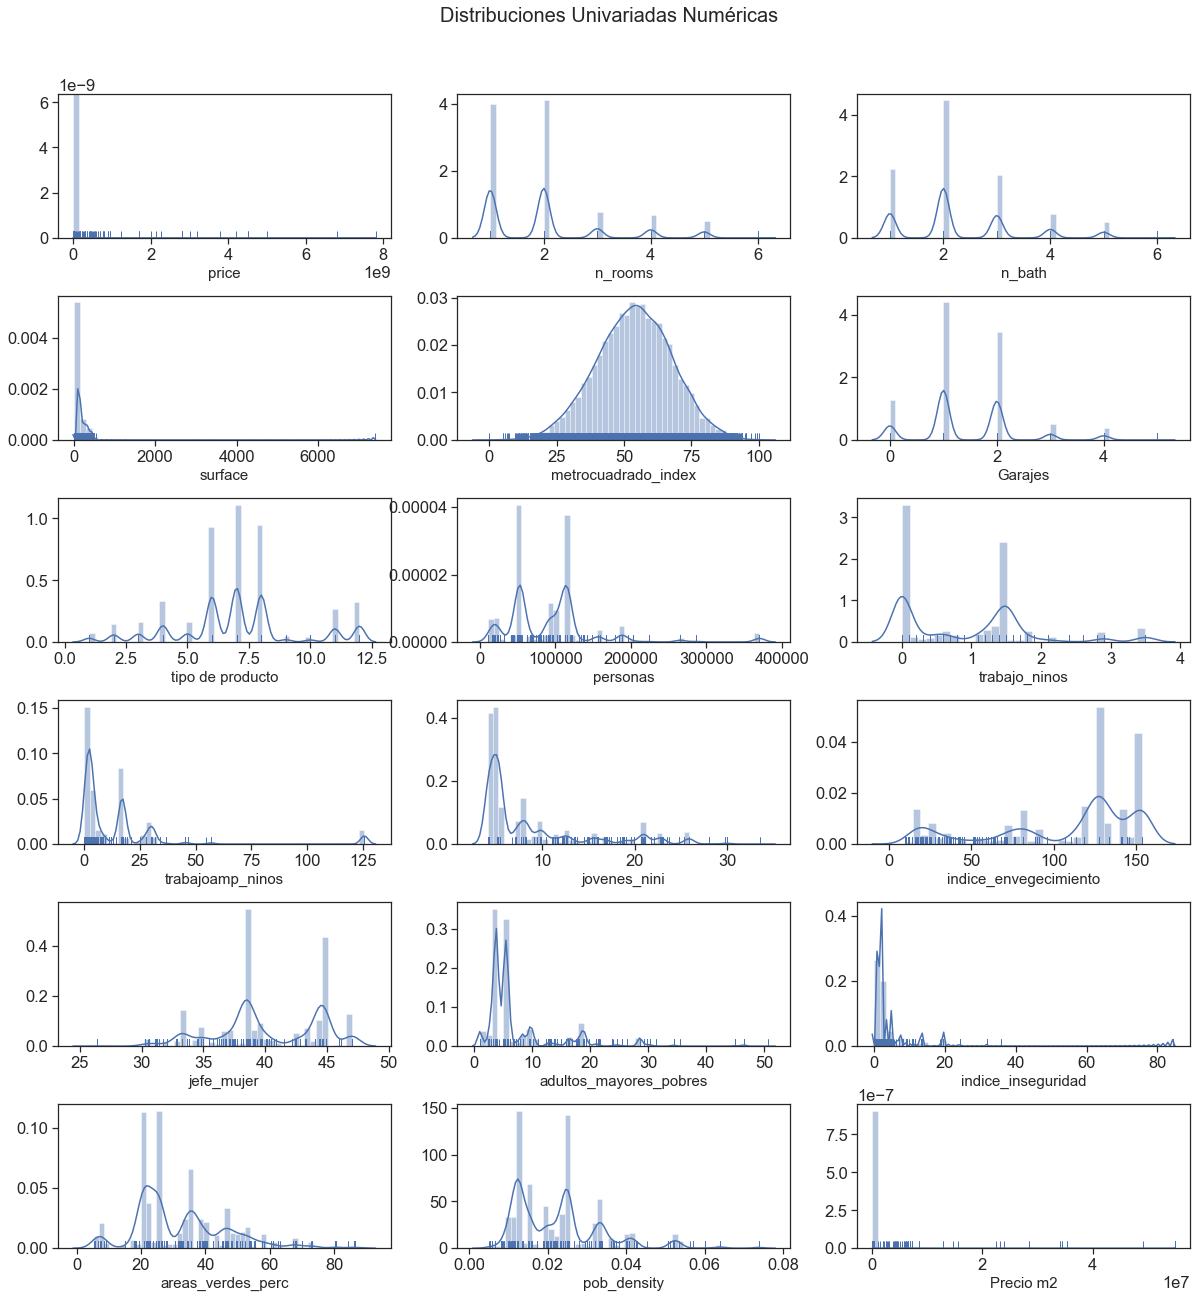

In [19]:
# perfil univariado

# Grilla de subplots
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=[17, 17])

# Se remueven el ultimo plot
#list(map(lambda a : a.remove(), ax[-1,-1:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()

# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Numéricas',
             fontsize=20,
             x=0.5,
             y=1.05)
'''
Se recorre cada axis, para cada columna del dataframe, se genera un grafico 
distinto en funcion del tipo de dato.

'''
for axis, col in zip(ax.flatten(), numeric):
    try :
        # Graficos para datos numericos
        sns.distplot(df[('numeric', col)], ax=axis, rug=True)
               
    except RuntimeError:
        print('Solo NaN en',col)
        #sns.distplot(df[('numeric', col)], ax=axis, rug=True, kde=False)
    
    axis.set_xlabel(col, fontsize=15)
estilo()
# Se ajusta el espaciado interno entre subplots
w, h = (.2, .4)
plt.subplots_adjust(wspace=w, hspace=h)

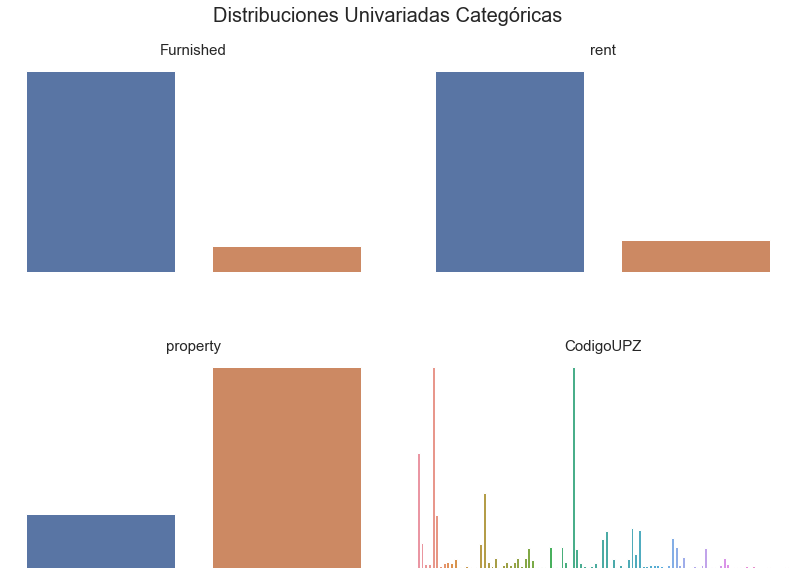

In [20]:
# Grilla de subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=[12, 8])

# Se remueven los ultimos 3 plots
#list(map(lambda a : a.remove(), ax[-1,-1:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()


# Variables categóricas relevantes
categorical_2 = list(set(categorical) - set(['url','details','location']))

# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Categóricas',
             fontsize=20,
             x=0.5,
             y=1.05)
'''
Se recorre cada axis, para cada columna del dataframe, se genera un grafico 
distinto en funcion del tipo de dato.

'''
for axis, col in zip(ax.flatten(), categorical_2):

    # Graficos para datos tipos str
    sns.countplot(df[('categorical',col)], ax=axis)
    axis.set_axis_off()
    axis.set_title(str(col), fontsize=15)


# Se ajusta el espaciado interno entre subplots
h, w = (.4, .1)
plt.subplots_adjust(wspace=w, hspace=h)

In [21]:
# Se genera una función auxiliar

def indexer(cols, t_c = df.columns):
    '''Genera columnas multinivel a partir de nombres de columna planos.'''
    
    set_to_tuple = set(*[cols])

    tuples = [
        i for i in t_c if set_to_tuple.intersection(set(i))
    ]
    
    return tuples

In [22]:
# Gráfico de violín vs Precio m2

def violinplot(col, df = df):
    # Sirve para fija el tamaño de lasetiquetas del plot
    fontdict = {'fontsize':20}

    # Estrucutra de figura y axes
    (fig, ax) = plt.subplots(2,1,figsize=[12,13])

    # violin plot --> equivalente a catplot(kind = 'violin')

    sns.violinplot(indexer([col], t_c = df.columns)[0],
                y=('numeric', 'Precio m2'),
                data=df,
                kind='violin',
                ax=ax[0])

    sns.countplot(df[indexer([col], t_c = df.columns)[0]], ax=ax[1])

    ax[0].set_xlabel(col, fontdict)
    ax[1].set_xlabel(col, fontdict)

    ax[0].set_ylabel('Precio m2', fontdict)
    ax[0].set_title('Violin plot '+col+' vs Precio m2', fontdict)
    ax[1].set_title('Frecuencias '+col, fontdict)

    h, w = (.3, .1)
    plt.subplots_adjust(wspace=w, hspace=h)

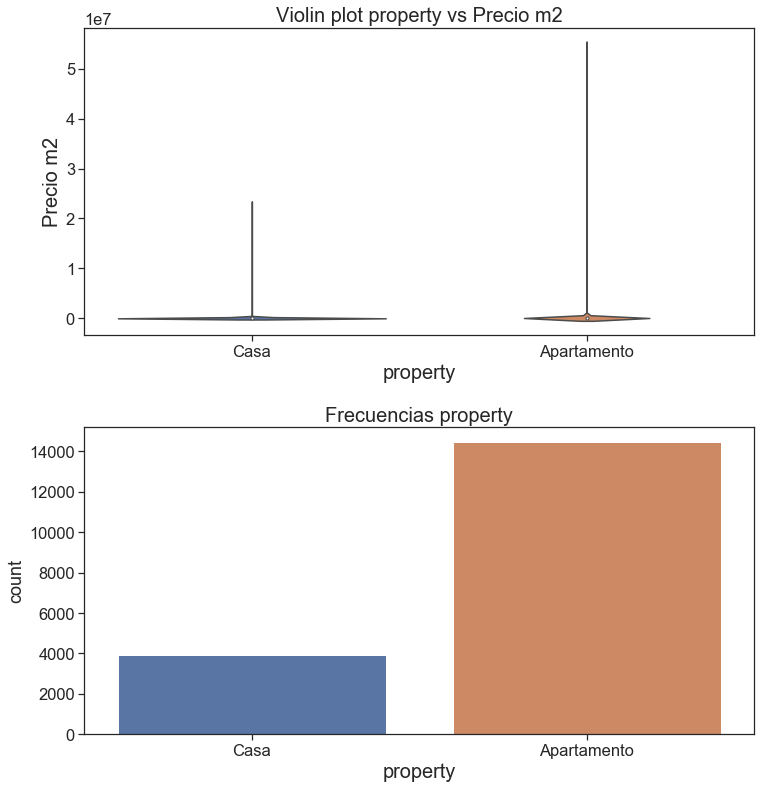

In [24]:
violinplot('property')

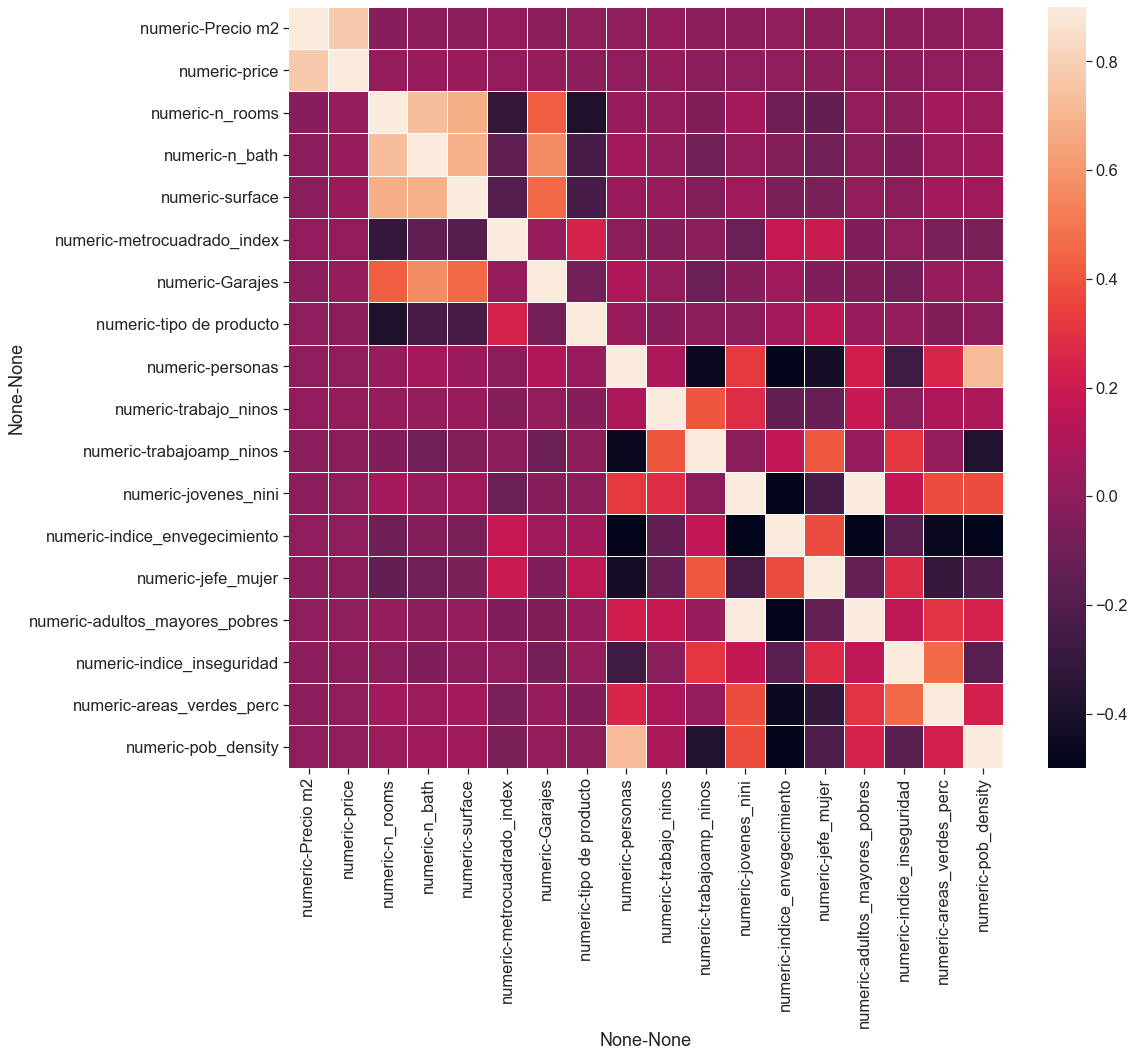

In [25]:
# estudiar correlaciones
corrmat = df.corr()
col = indexer(['Precio m2'])

unsorted = list(corrmat.columns)
unsorted.remove(*col)
unsorted.insert(0, *col)

sortd = pd.MultiIndex.from_tuples(unsorted)
corrmat = corrmat.reindex(index = sortd, columns = sortd)
'''
Dado lo anterior, se ajusta el anchor de colores con maximo en .9
y -0.5, para tener una perspectiva entorno a los valores maximos 
de correlacion (negativa y positiva)
'''

fig, ax = plt.subplots(figsize=[16, 14])

sns.heatmap(corrmat, vmin = -.5, vmax = .9, linewidths=.01)

In [26]:
corrmat[col].nsmallest(5,col)

numeric
                           Precio m2
numeric n_rooms            -0.021039
        trabajoamp_ninos   -0.015524
        surface            -0.013488
        indice_inseguridad -0.007990
        Garajes            -0.007378

In [27]:
# Estudiar datos faltantes
import missingno as msno

In [28]:
df.replace('nan',np.nan, inplace = True) 
df.isnull().sum()

numeric      price                        0
             n_rooms                     34
             n_bath                     219
             surface                      0
             metrocuadrado_index          0
             Garajes                      0
             tipo de producto             0
             personas                  1741
             trabajo_ninos             1741
             trabajoamp_ninos          1741
             jovenes_nini              1741
             indice_envegecimiento     1741
             jefe_mujer                1741
             adultos_mayores_pobres    1741
             indice_inseguridad        1741
             areas_verdes_perc         1741
             pob_density               1741
             Precio m2                    0
categorical  url                          0
             location                   308
             details                    113
             rent                         0
             property           

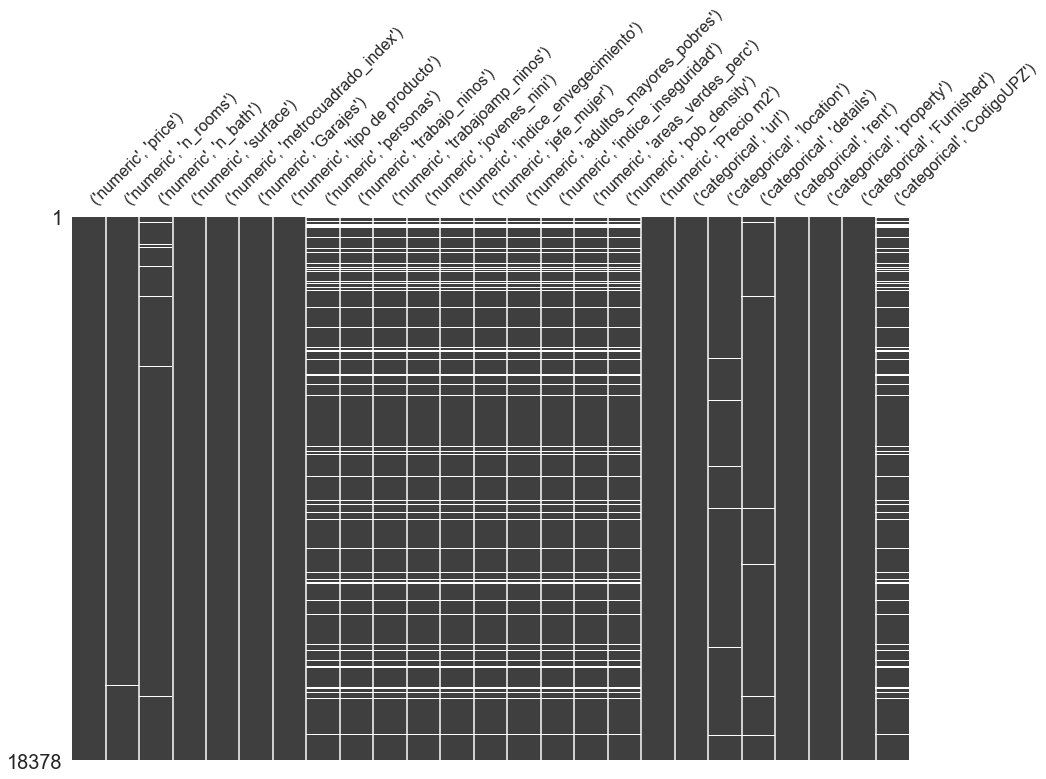

In [29]:
fig, ax = plt.subplots(figsize = [15, 10])
msno.matrix(df,ax = ax, sparkline=False)

In [32]:
#Columnas con más información faltante
MisInfo = ['personas', 'trabajo_ninos',
           'trabajoamp_ninos', 'jovenes_nini',
           'indice_envegecimiento', 'jefe_mujer', 'adultos_mayores_pobres',    
           'indice_inseguridad', 'areas_verdes_perc', 'pob_density','CodigoUPZ']
MisInfo = indexer(MisInfo)

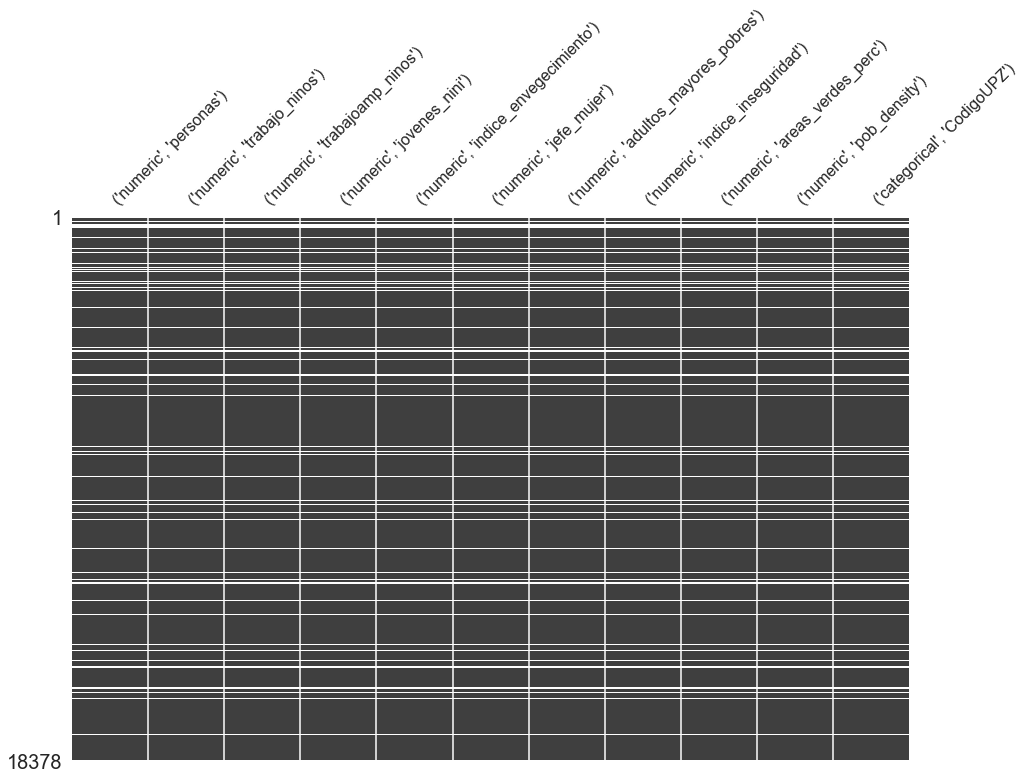

In [33]:
fig, ax = plt.subplots(figsize = [15, 10])
msno.matrix(df[MisInfo],ax = ax, sparkline=False)

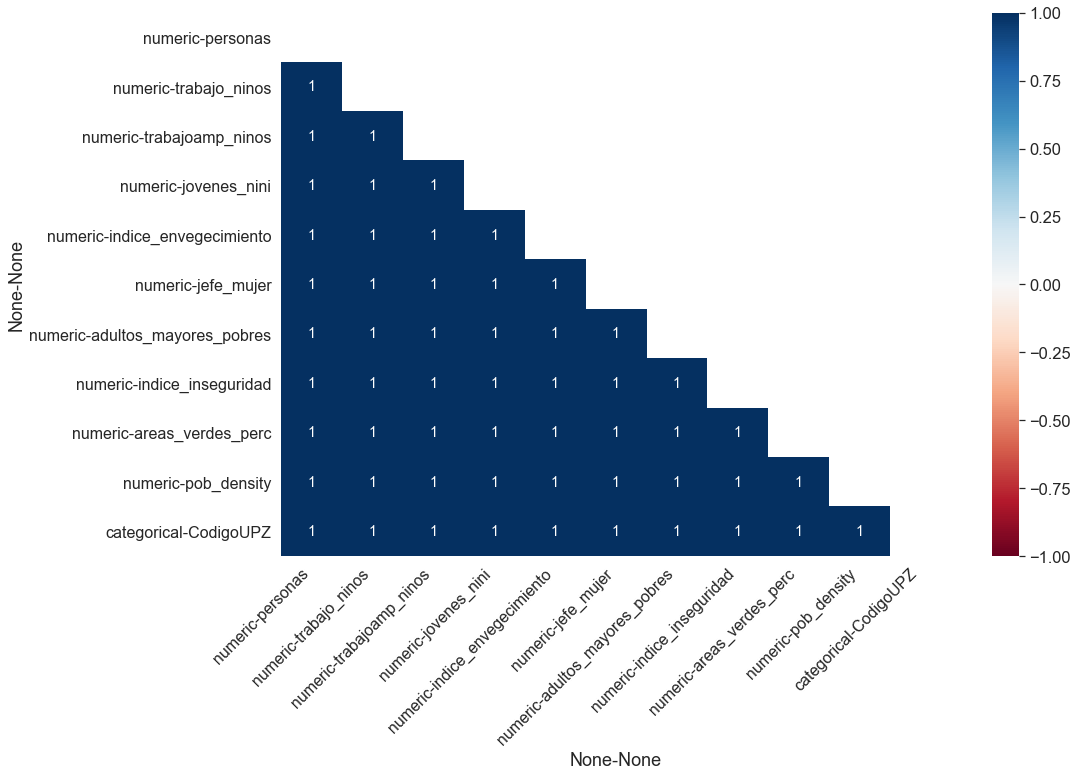

In [34]:
fig, ax = plt.subplots(figsize = [15, 10])
msno.heatmap(df[MisInfo], ax = ax)

In [35]:
# Recategorizar la variable CodigoUPZ
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [36]:
# Se asignan los valores NaN a una nueva categoría 'UPZ0'
X = df[indexer(['CodigoUPZ'])].replace(np.nan,'UPZ0') 

# Se elimina la columna de 'CodigoUPZ'
df.drop(indexer(['CodigoUPZ']), axis = 1, inplace = True)

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
X = enc.transform(X).toarray()
y = np.array(df[indexer('Precio m2')])


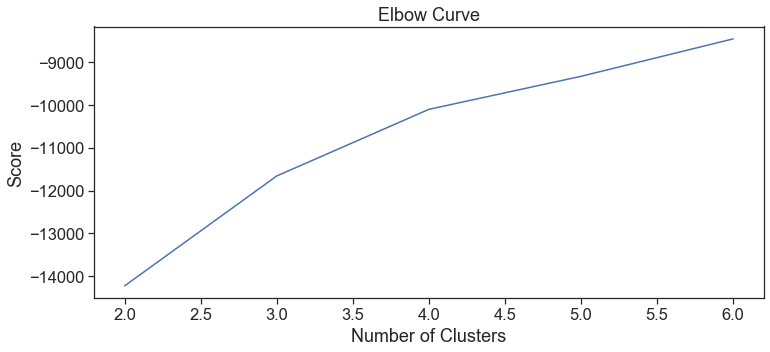

In [37]:
Nc = range(2,7)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc,score)
estilo()
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

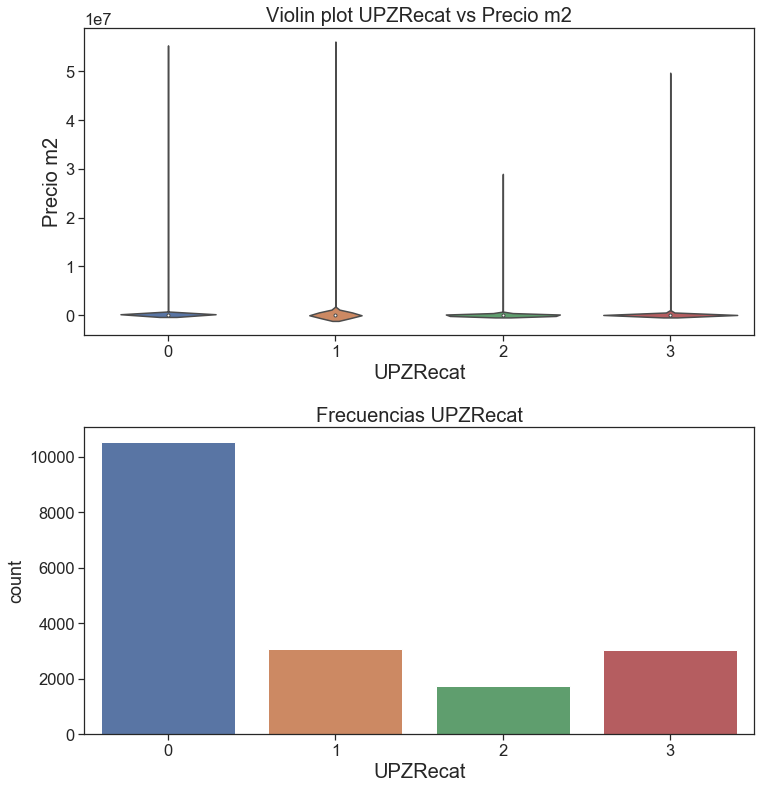

In [46]:
# Se elije una cantidad de 4 clusters
kmeans = KMeans(n_clusters=4).fit(X)
labels = kmeans.predict(X)

# Se agrega la nueva columna
df[('categorical','UPZRecat')] = labels
violinplot('UPZRecat', df=df)

In [47]:
# Se estudian los grupos inducidos por 'UPZRecat'
idx = indexer(['Precio m2','UPZRecat'], t_c= df.columns)
grouped = df[idx].groupby(idx[1])
total_groups = len(grouped.groups)
groups = [grouped.get_group(i) for i in range(total_groups)]

In [48]:
def group_cleaner(group):
    group_0 = group.copy()
    name = group_0.iloc[0,1]
    group_0.drop(indexer(['UPZRecat'],t_c= df.columns), axis=1, inplace=True)
    group_0.columns  = ('cat_{}'.format(name),)
    
    return group_0

In [49]:
from scipy.stats import f_oneway
groups_to_test = list(map(group_cleaner, groups))

F,p = f_oneway(*groups_to_test)

print('Estadistico F:',F)
print('p valor :', p)

Estadistico F: [6.81372167]
p valor : [0.00013822]


Como p es menor a 5%, se concluye que hay suficiente diferencia entre los grupos generados por UPZRecat

In [57]:
# Varibles a estudiar
var = [
    'n_rooms', 'n_bath', 'Garajes', 'metrocuadrado_index','tipo de producto', 
    'indice_envegecimiento', 'jefe_mujer_perc', 'UPZRecat', 'property', 'Furnished',
    'Precio m2'
]
idxs = indexer(var, t_c = df.columns)
idxs.sort()
idxs.remove(('numeric', 'Precio m2'))
idxs.append(('numeric', 'Precio m2'))

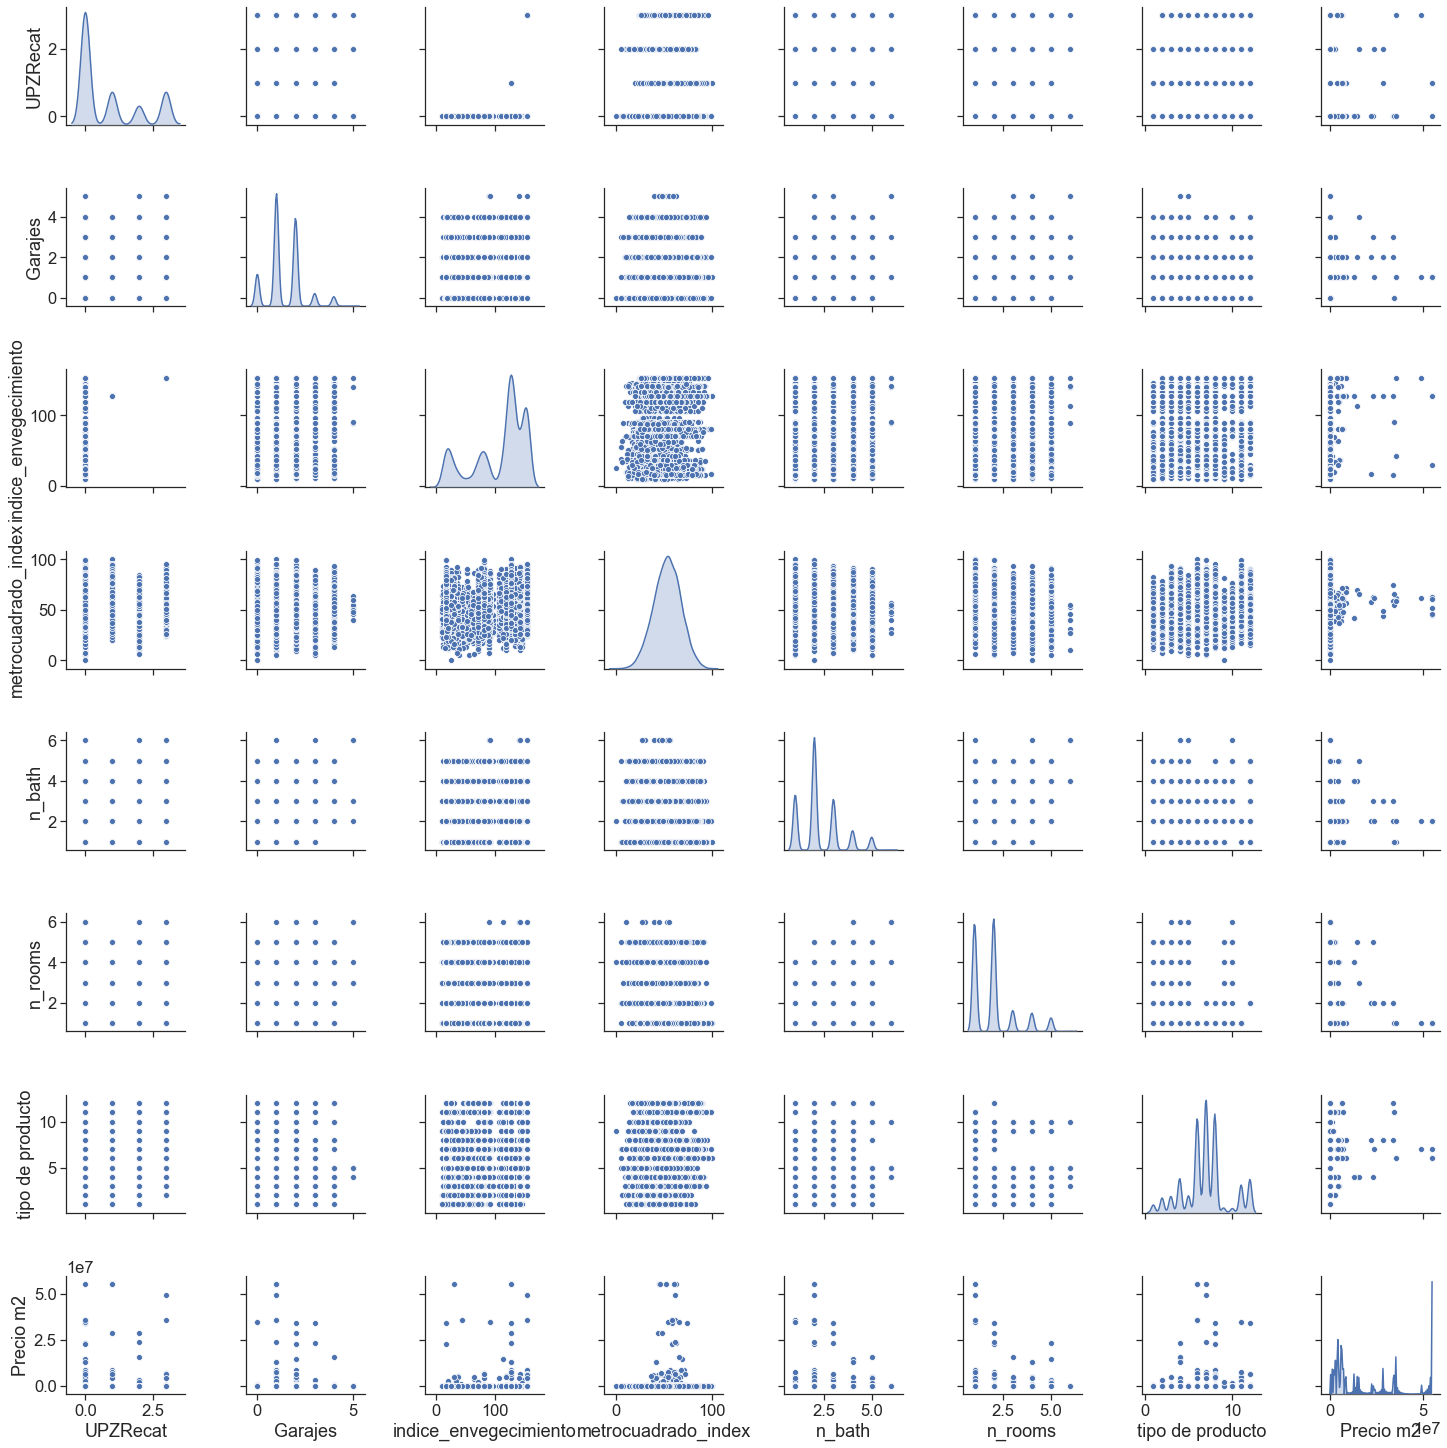

In [58]:
data = df.reindex(idxs, axis=1).droplevel(0,axis=1)
sns.pairplot(data = data, diag_kind='kde')

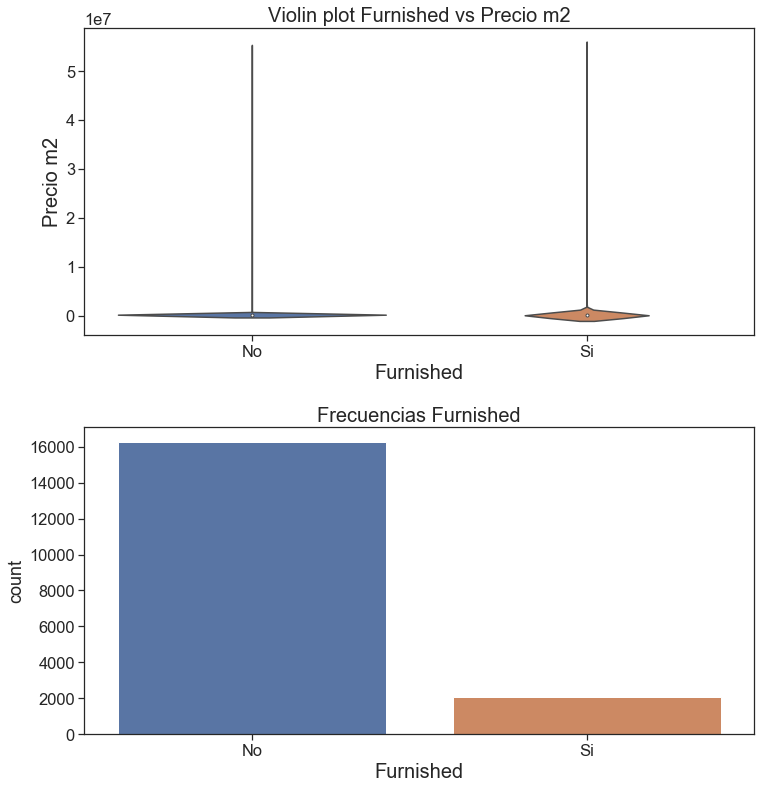

In [59]:
violinplot('Furnished', df = df)

In [60]:
from scipy.stats import iqr

In [61]:
iqr_val = iqr(df[indexer(['Precio m2'])])

cota_sup = np.percentile(df[indexer(['Precio m2'])],75) + iqr_val*1.5
cota_sup

69478.8845083488

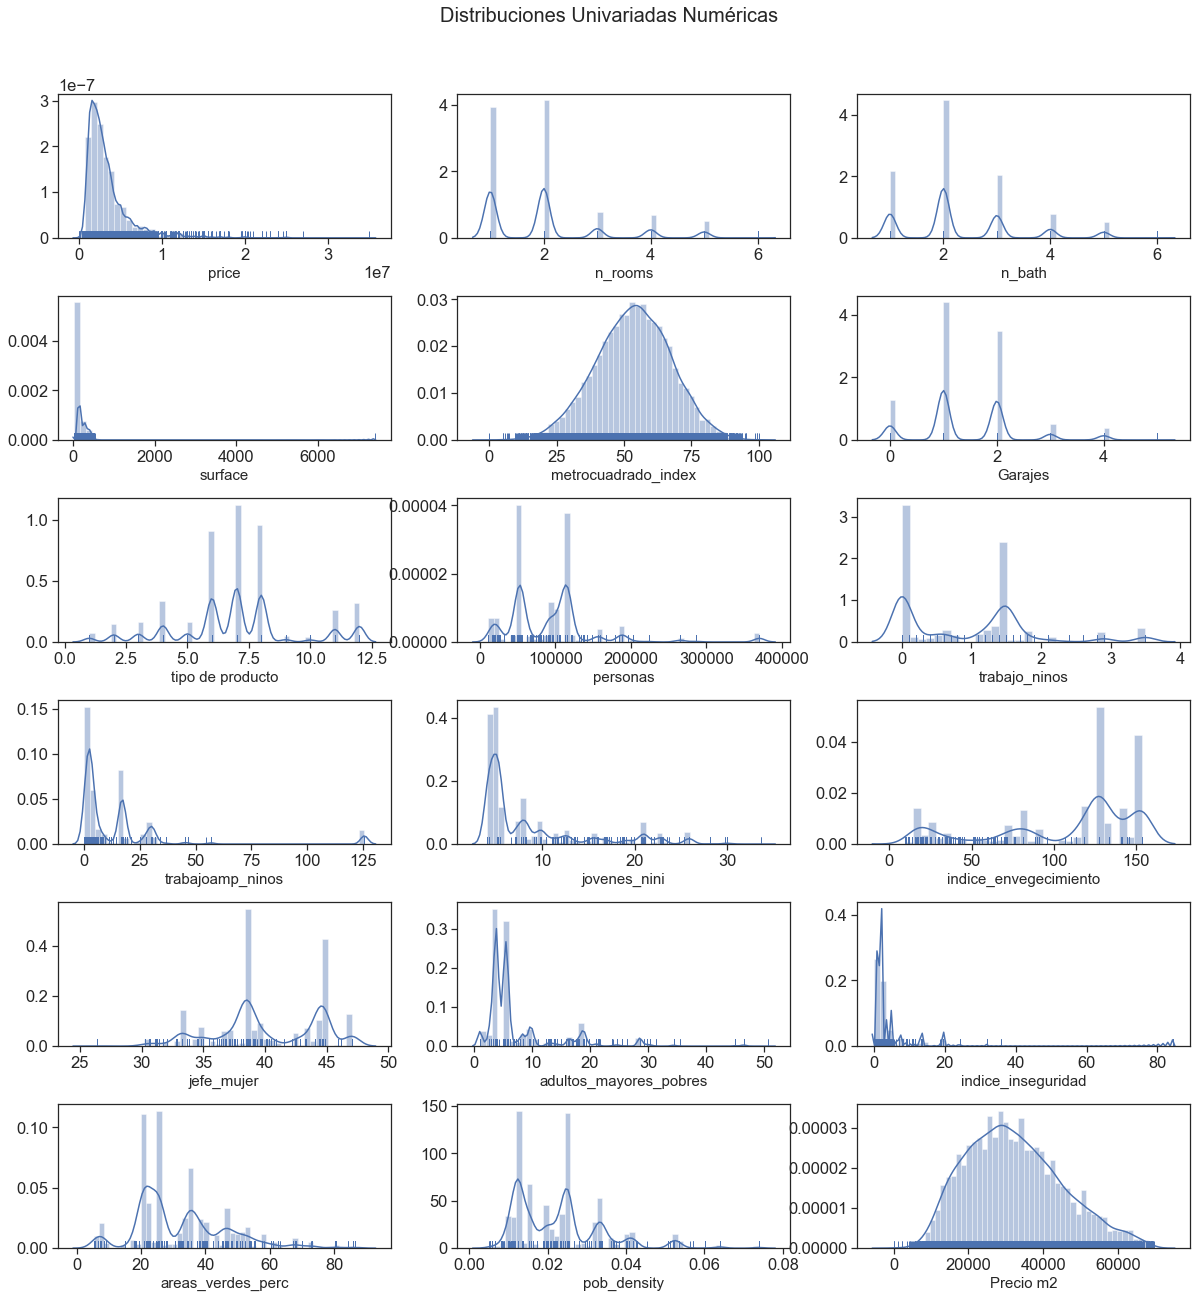

In [62]:
# Filtrar valores anómalos

df2 = df[df[('numeric','Precio m2')] <= cota_sup]

# perfil univariado

# Grilla de subplots
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=[17, 17])

# Se remueven el ultimo plot
#list(map(lambda a : a.remove(), ax[-1,-1:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()

# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Numéricas',
             fontsize=20,
             x=0.5,
             y=1.05)
'''
Se recorre cada axis, para cada columna del dataframe, se genera un grafico 
distinto en funcion del tipo de dato.

'''
for axis, col in zip(ax.flatten(), numeric):
    try :
        # Graficos para datos numericos
        sns.distplot(df2[('numeric', col)], ax=axis, rug=True)
               
    except RuntimeError:
        print('Solo NaN en',col)
        #sns.distplot(df[('numeric', col)], ax=axis, rug=True, kde=False)
    
    axis.set_xlabel(col, fontsize=15)
estilo()
# Se ajusta el espaciado interno entre subplots
w, h = (.2, .4)
plt.subplots_adjust(wspace=w, hspace=h)

In [63]:
df2[indexer(['Precio m2'])].shape

(18019, 1)

Menos del 2% de los datos tienen valores anómalos en 'Precio m2'

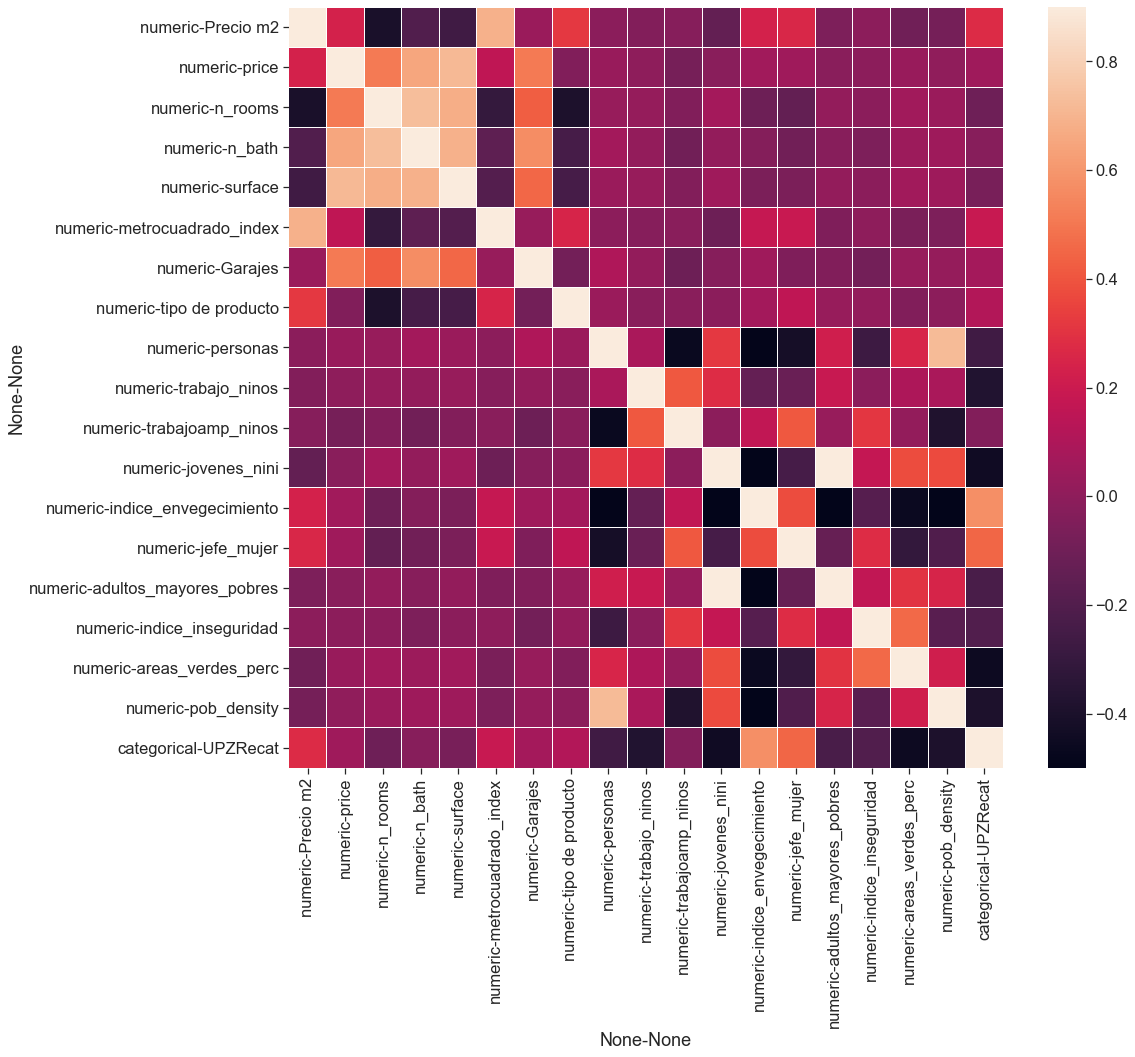

In [64]:
# estudiar correlaciones
corrmat = df2.corr()
col = indexer(['Precio m2'])

unsorted = list(corrmat.columns)
unsorted.remove(*col)
unsorted.insert(0, *col)

sortd = pd.MultiIndex.from_tuples(unsorted)
corrmat = corrmat.reindex(index = sortd, columns = sortd)
'''
Dado lo anterior, se ajusta el anchor de colores con maximo en .9
y -0.5, para tener una perspectiva entorno a los valores maximos 
de correlacion (negativa y positiva)
'''

fig, ax = plt.subplots(figsize=[16, 14])

sns.heatmap(corrmat, vmin = -.5, vmax = .9, linewidths=.01)

In [65]:
idxs2 = indexer(var, t_c = df2.columns)
idxs2.sort()
idxs2.remove(('numeric', 'Precio m2'))
idxs2.append(('numeric', 'Precio m2'))

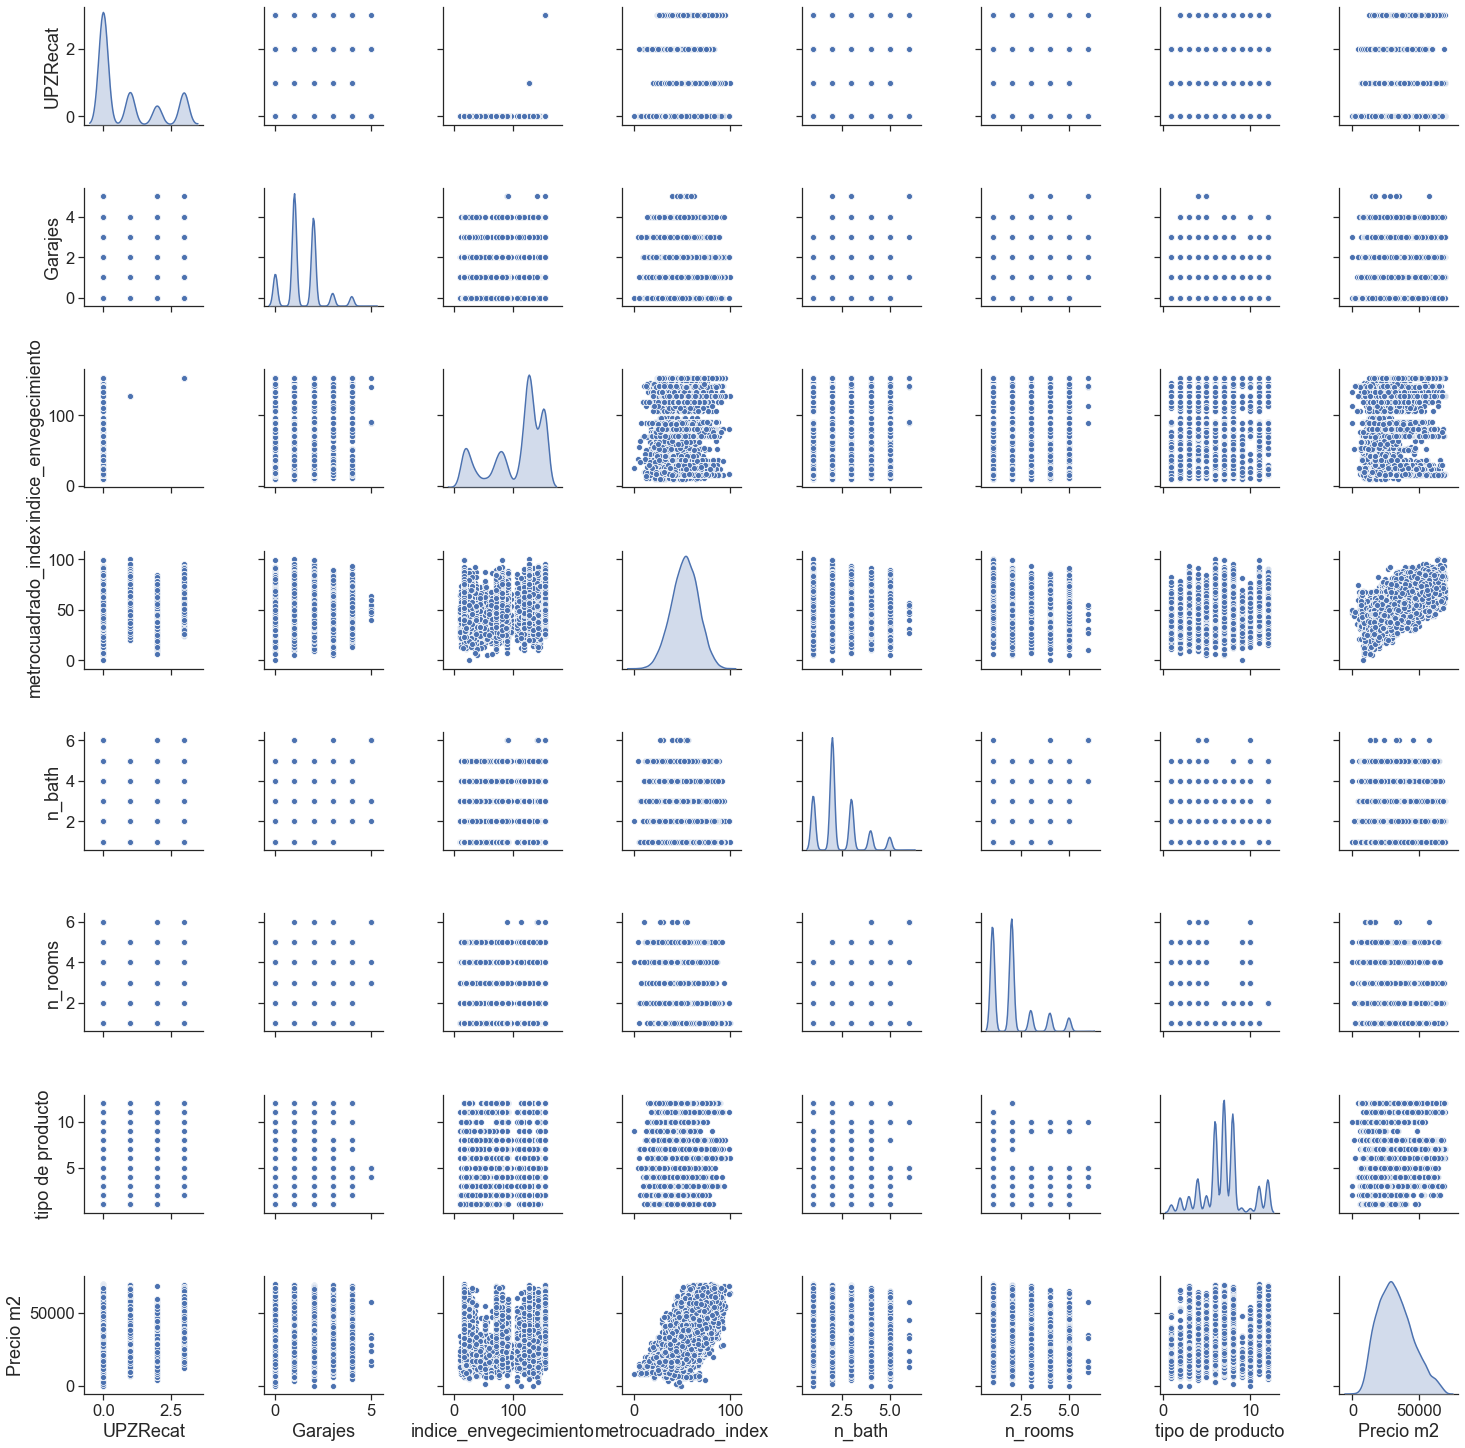

In [66]:
data = df2.reindex(idxs2, axis=1).droplevel(0,axis=1)
estilo()
sns.pairplot(data = data, diag_kind='kde')

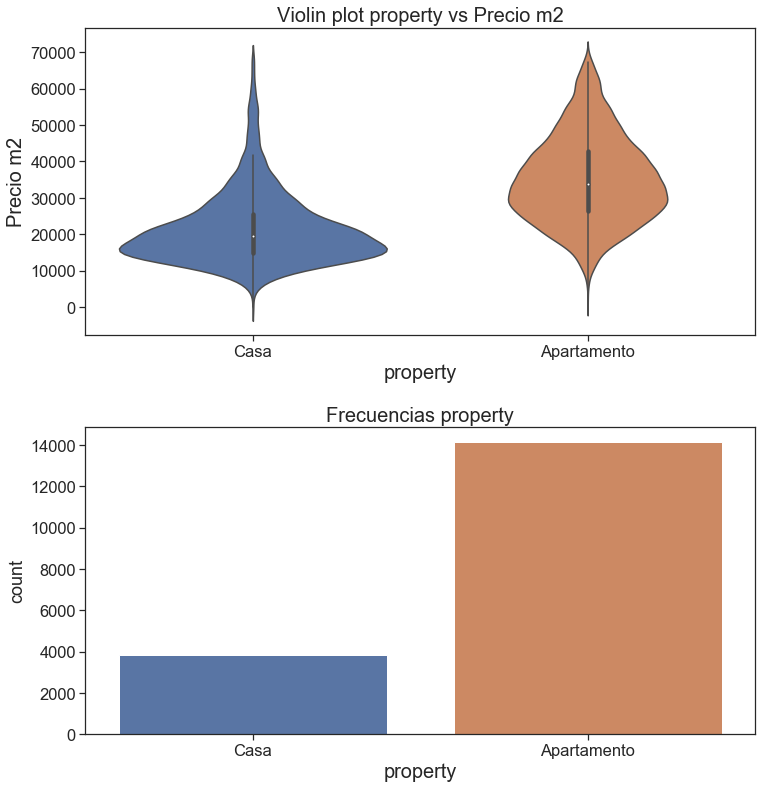

In [67]:
violinplot('property', df = df2)

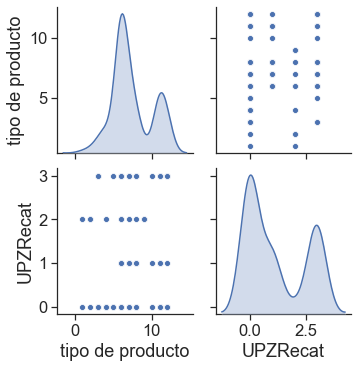

In [68]:
# Valores anómalos
df3 = df[df[('numeric','Precio m2')] > cota_sup]
variables = ['UPZRecat', 'tipo de producto']
ind = indexer(variables, t_c = df3.columns)
data = df3.reindex(ind, axis=1).droplevel(0,axis=1)
sns.pairplot(data = data, diag_kind='kde')

In [70]:
# Varibles a estudiar
var_final = [
    'n_rooms', 'metrocuadrado_index','tipo de producto','indice_envegecimiento',
    'jefe_mujer', 'UPZRecat', 'property', 'Furnished','Precio m2'
]

### P3